# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2020



#Στοιχεία Ομάδας
##Ομάδα 35

#### - Καλτσογιάννης Δημήτρης       *03115628*
#### - Μάμαλη Αικατερίνη            *03116017*
#### - Τριανταφυλλόπουλος Ηλίας     *03116028*

In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
!pip install --upgrade somoclu

     |████████████████████████████████| 1.5MB 12.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.4 MB 13.7 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=e52538f9528d2f7957e05c81dd3fd08fdfb384591265b2463f133aeace065bb7
  Stored in directory: /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 22.2 MB 61.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 6.1 MB 1.1 MB/s 
  Created wheel for somoclu: filename=s

In [ ]:
#getting saved data
import joblib
import somoclu
som10 = joblib.load('som10.pkl')
som20 = joblib.load('som20.pkl')
som25 = joblib.load('som25.pkl')
som30 = joblib.load('som30.pkl')
final_corpus = joblib.load('final_corpus.pkl')
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα έχει έναν αριθμό "seed" (φύτρο) που είναι ο ίδιος με τον αριθμό της ομάδας σας: θα τον βρείτε στην κολόνα Α/Α [εδώ](https://docs.google.com/spreadsheets/d/1CD6AtX7YnocXceCELl_XJ06kyRr0YQPhor8dpw012t0/edit?usp=sharing).

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 35

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Blue']
['"Action",  "Drama",  "Bollywood",  "World cinema"']
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing) των ασκήσεων.


In [ ]:
print(corpus_tf_idf.shape)

(5000, 48781)


Παρατηρούμε ότι η διάσταση του corpus μας είναι πολύ μεγάλη. Κατά την διαδικασία βελτιστοποίησης που θα ακολουθήσουμε παρακάτω, θα προσπαθήσουμε τόσο να βελτιώσουμε τις προτάσεις ταινιών που το σύστημα μας εξάγει, όσο και να μειώσουμε την διάσταση του corpus για να κρατήσουμε την πιο σημαντική πληροφορία αυτού.

## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


In [ ]:
import math
import scipy as sp
import numpy as np

def content_recommender(target_movie, max_recommendations):

  target_movie_tfidf = corpus_tf_idf[target_movie]
  tm_magnitube = math.sqrt(target_movie_tfidf.power(2).sum())
  #cosine similarity evaluation
  #for vectors A, B -> cos() = A*B / |A|*|B|
  cosine_sim = []
  for b in corpus_tf_idf:
    #use round because for some reason probably connected to sqrt, we woulb notice that cos() of target_movie when compared to itself was
    #1.0000000000000009 which is not the expected result
    cosine_sim.append(round(target_movie_tfidf.multiply(b).sum() / (tm_magnitube*math.sqrt(b.power(2).sum())), 10))
  
  #sorting the list and keeping the indexes of max_recommendations(quantity) more similar movies
  similar_movies = np.argsort(cosine_sim)[-(max_recommendations+1):]

  #printing results
  print("Target Movie ID:", target_movie)
  print("Title:", titles[target_movie][0])
  print("Corpus:", corpus[target_movie])
  print("Categories:", categories[target_movie][0]) 
  print("---------------------------------------")

  for i in range(1, max_recommendations+1):
    ID = similar_movies[max_recommendations-i]
    print("Order:", i)
    print("Target Movie ID:", ID)
    print("Title:", titles[ID][0])
    print("Corpus:", corpus[ID])
    print("Categories:", categories[ID][0])
    print("------------------------------------")

content_recommender(99, 5)

Target Movie ID: 99
Title: Blue
Corpus: The story follows three men on a underwater treasure hunt. In Bahamas, Aarav  runs a successful fishing company under the title of Blue. He works with Sagar  who works as a diver for Aarav's fishing company. Sagar is in a relationship with Mona and about to propose her . Aarav is rich, wealthy and has lots of fame, while on the other hand, Sagar is under a financial crisis. To help him, Aarav advises Sagar to retrieve the lost treasure of a sunken ship called Lady in Blue. However, Sagar refuses to go to the ship as he has a haunted past with the ship. Meanwhile, Sagar's younger brother Sam  is in Bangkok. Sam is a bike rider, and meets with Nicki  who works for an underworld gangster named Gulshan . Sam is challenged by Gulshan on a bike race, and after Sam wins, Gulshan hires Sam to work for him. Sam is setup by Gulshan in failing in deliver a package costing Gulshan $50 million. Sam must either pay his money back or die. Sam does not have the 

Χρησιμοποιούμε αρχικά το σύνολο του Dataset μας και δημιουργούμε την βασική μας συνάρτηση που θα επιστρέφει τα αποτελέσματα του συστήματος συστάσεων. Έχουμε μία naive υλοποίηση του TfidfVectorizer και ομοιότητα συνημιτόνου για την εξαγωγή συμπερασμάτων. 

Επικεντρωνόμαστε στο παραπάνω παράδειγμα της 100ης ταινίας του dataset μας. Κρίνοντας από τις κατηγορίες που ανήκει η συγκεκριμένη ταινία και τα αποτελέσματα του συστήματος, δεν βλέπουμε αρκετή ομοιότητα. Αυτό πιθανώς οφείλεται σε κάποια ομοιότητα που βρέθηκε μέσα στην περιγραφή των ταινιών, η οποία έχει ως στόχο της κάποιες κοινές λέξεις ή και φράσεις που δεν θα έπρεπε να αποτελούν δείκτες ομοιότητας. Επομένως, η βελτιστοποίηση κρίνεται απαραίτητη.

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




In [ ]:
content_recommender(10, 2)

Target Movie ID: 10
Title: Good Day for a Hanging
Corpus: Eddie Campbell watches a stagecoach as it rides toward a Nebraska town. Other members of his gang are waiting there to rob the bank. Ben Cutler, owner of the stage line, is on board, and is returning home to be wed to Ruth Granger. During the holdup, a bank teller is killed. Ben joins the posse. His daughter, Laurie, is in love with Eddie and doesn't believe him to be truly bad. Eddie shoots the sheriff, however. He is wounded by Ben and brought back to town to stand trial. Ben is offered a temporary job as marshal. Selby, a publicity-seeking lawyer who defends Eddie, insinuates that Ben was just acting in vengeance because his client had been intimate with Ben's daughter. Ben punches him for this slur on Laurie's character. Eddie is found guilty due to Ben's eyewitness testimony. He is sentenced to hang. Townspeople begin to have their doubts, even Ruth, partly due to Eddie's manipulation of their emotions. Laurie tries to smug

Παρατηρούμε ότι τα αποτελεσμάτα δεν είναι βελτιστοποιημένα, αλλά δεν είναι και τελείως άσχετα μεταξύ τους, καθώς υπάρχει για παράδειγμα η κατηγορία Action στην 2η πρόταση. 

In [ ]:
content_recommender(17, 2)

Target Movie ID: 17
Title: Revolt in the Stars
Corpus: In the screenplay's story which takes place 75 million years ago, an evil galactic ruler "Xenu" massacres millions of people and is assisted by "Chu", the Executive President of the Galactic Interplanetary Bank, and "Chi", the Galactic Minister of Police. The beings are stacked around the bases of Earth's volcanoes including Loa, Mount Vesuvius, Mount Shasta, Mount Fuji, Mount Etna and others, and exterminated with planted charges of atomic bombs. Xenu's massacre of these beings is called "Phase III".
Categories: "Science Fiction"
---------------------------------------
Order: 1
Target Movie ID: 460
Title: Desperate Search
Corpus: After taking off from Vancouver, a Douglas DC-3 airliner catches on fire and crashes in the Canadian north. On board were two young children, Don  and Janet Heldon , ultimately the only survivors. Their father, pilot Vince  and his wife Julie  join forces with the family friend, bush pilot "Brandy"  and N

Εδώ παρατηρούμε ότι οι 2 προτάσεις μεταξύ τους είναι σχετικά κοινές. Η συσχέτιση τους όμως με την κύρια ταινία που τέθηκε προς αναζήτηση συστάσεων είναι αμφισβητούμενη.

In [ ]:
content_recommender(42, 3)

Target Movie ID: 42
Title: Madame Bovary
Corpus: The film opens with Gustave Flaubert  in court to defend his novel, which has been accused of being a "disgrace to France and an insult to womanhood". In order to keep it from being banned, Flaubert tells the story of Madame Bovary from his perspective. We are introduced to Emma  when she is twenty years old. She lives with her father  on a small farm in the country. She is a lonely girl, and books are her only real companions. She fantasizes about love, and convinces herself that she will one day fall madly in love and have a perfect life. One day, Emma's father injures his leg. When the doctor, Charles Bovary  comes, Emma falls in love with him instantly. Soon enough, Emma and Charles are married. The couple moves into a small house in the town of Yonville in Normandy. Emma is disappointed, but vows to make the house into her dream home. She insists upon decorating the house lavishly, and although Charles makes only a modest salary, he

Εδώ βλέπουμε ότι η κατηγορία Drama αποτελεί κοινή συνιστώσα μεταξύ των ταινιών.

In [ ]:
#αρχική διάσταση του corpus μας / από πόσες λέξεις αποτελείται

import nltk
nltk.download('punkt') # χρειάζεται για το tokenizer
words = []
for doc in corpus:
    words += nltk.word_tokenize(doc)
print("Total words in corpus:\t", len(words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Total words in corpus:	 1775708


Αρχικά υπολογίζουμε τον συνολικό αριθμό λέξεων που υπάρχει στο dataset μας. Αυτός ανέρχεται στις 1775929 λέξεις. Στόχος μας θα είναι η μείωση αυτών αφαιρώντας λέξεις, οι οποίες δεν μας προσφέρουν σημαντικά κριτήρια για την ομοιότητα των ταινιών. Έτσι, θα πρέπει να αφαιρέσουμε τέτοιες λέξεις από το dataset μας, ώστε να οδηγηθούμε σε ασφαλέστερα συμπεράσματα. 

In [ ]:
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
from nltk.corpus import stopwords
import string

filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]

print("Total words in corpus:\t", len(filtered_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Total words in corpus:	 927061


Σαν αρχική επεξεργασία των λεγόμενων stop words, εισάγουμε τις βασικές stopwords των αγγλικών και τα σημεία στίξης. Ήδη, οι συνολικές λέξεις του dataset μας μειώθηκε στις 927061 λέξεις.

Θέλουμε να προσθέσουμε και άλλες stopwords που προκύπτουν από τις παρατηρήσεις μας πάνω στο dataset. 

In [ ]:
#https://www.matthewjockers.net/macroanalysisbook/expanded-stopwords-list/
new_stop_words = pd.read_csv('./mystopwords', sep=',', header=None, error_bad_lines=False, skipinitialspace=True)
for i in new_stop_words.values:
  new_stop_words = list(i) 
new_stop_words

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 'a',
 'aaron',
 'abbey',
 'abbie',
 'abdul',
 'abe',
 'across',
 'abel',
 'abigail',
 'about',
 'above',
 'abraham',
 'abram',
 'abst',
 'accordance',
 'according',
 'act',
 'actually',
 'ada',
 'adah',
 'adalberto',
 'adaline',
 'adam',
 'adan',
 'added',
 'among',
 'addie',
 'adela',
 'adelaida',
 'adelaide',
 'adele',
 'adelia',
 'adelina',
 'adeline',
 'adell',
 'adella',
 'adelle',
 'adena',
 'adina',
 'adj',
 'adolfo',
 'adolph',
 'adopted',
 'adria',
 'adrian',
 'adriana',
 'adriane',
 'adrianna',
 'adrien',
 'adrienne',
 'after',
 'afterwards',
 'afton',
 'again',
 'against',
 'agatha',
 'agnes',
 'agnus',
 'agueda',
 'agustina',
 'ahmad',
 'ahmed',
 'ai',
 'aida',
 'besides',
 'aide',
 'aiko',
 'aileen',
 'ailene',
 'aimee',
 'aja',
 'akilah',
 'al',
 'alaina',
 'alaine',
 'alan',
 'alana',
 'alane',
 'alanna',
 'alayna',
 'alba',
 'albert',
 'alberta',
 'albertha',
 'albertina',
 'albertine',
 'alberto',
 'albina',
 'alda',
 'alden',
 

Κατά την παρατήρηση των κειμένων περιγραφής παρατηρήσαμε ότι τα ονόματα χαρακτήρων δημιουργούσαν πολύ συχνά σύγχυση στις ταινίες που πρότεινε το σύστημα. Γι' αυτό προσθέσαμε το αρχείο "mystopwords", που περιέχει ένα [κατάλογο](https://www.matthewjockers.net/macroanalysisbook/expanded-stopwords-list/) με stop words που περιλαμβάνει κύρια ονόματα.

In [ ]:
new_stop_words= new_stop_words+["story","film","movie", "plot","about", "someone", "starts", "meet", "want", "told", "'s"]

Στη συνέχεια, όπως φαίνεται παραπάνω επεκτείναμε το αρχείο με τις stop words μας κάποιες βασικές λέξεις, οι οποίες θα μπορούσαν να δημιουργήσουν πρόβλημα στο συγκεκριμένο dataset. Έτσι, αφού πρόκειται για ένα σύνολο ταινιών, λέξεις όπως film, movie, plot, story είναι πολύ κοινές και για αυτό τις αφαιρούμε. Επιπλέον, συναντήσαμε άλλες πολύ κοινές λέξεις που σχετίζονται με την προσπάθεια περιγραφής του περιεχομένου μιας ταινίας, καθώς φράσεις όπως "the film is about someone...." ή "the movie starts with ...." είναι πολύ συνηθισμένες. Έτσι, προσπαθήσαμε να συμπεριλάβουμε και τέτοιες παρόμοιες stop words. 

In [ ]:
final_words = [word for word in filtered_words if word not in new_stop_words]

print("Total words in corpus:\t", len(final_words))

Total words in corpus:	 816065


Τελικώς, παρατηρούμε ότι οι λέξεις μας μειώθηκαν σε 816065. 

In [ ]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

Στη συνέχεια δημιουργούμε δύο συναρτήσεις που περιλαμβάνουν όλη την παρπάνω προεπεξεργασία.

In [ ]:
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import collections
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()

new_stop_words = pd.read_csv('./mystopwords', sep=',', header=None, error_bad_lines=False, skipinitialspace=True)
for i in new_stop_words.values:
  new_stop_words = list(i) 
new_stop_words= new_stop_words+["story","film","movie", "plot","about", "someone", "starts", "meet", "want", "told", "'s", "poe"]

def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

def preprocess_document(document):
    # όλα τα προηγούμενα βήματα που κάναμε μέχρι στιγμής
    words = nltk.word_tokenize(document.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation) + new_stop_words]
    filtered_words = thorough_filter(filtered_words)
    stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]
    return (" ".join(stemmed_words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Στην παραπάνω προεπεξεργασία, χρησιμοποιούμε τις stopwords όπως ακριβώς και παραπάνω, προσθέτοντας ένα φίλρο **stemmer**. Συγκεκριμένα η λειτουργία αυτού του φίλτρου είναι να απομακρύνει τα άκρα των λέξεων με την ελπίδα να φέρει τις λέξεις σε μια κοινή μορφή βάσης (ουσιαστικά πρόκειται για αφαίρεση καταλήξεων). Οι τεχνικές που χρησιμοποιούνται είναι 2 : stemming και lemmatization. Δεν μπορούμε να χρησιμοποιήσουμε και τις 2 ταυτόχρονα. Η επιλογή της χρήσης stemming έγινε με δεδομένο ότι πρόκειται για την πιο συχνή. 

In [ ]:
final_corpus = [preprocess_document(doc) for doc in corpus]
print(final_corpus[0])

writer live shadow infam ancestor deadlin finish book move smalltown concentr novel meet fall troubl writer shadow ghost fall lover women turn murder poe-et fashion polic prime suspect murder save dark curs famili descend dir christman tenney perf heigl london dvd york horror 2003


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(final_corpus)
corpus_tf_idf = vectorizer.transform(final_corpus)

In [ ]:
print(corpus_tf_idf.shape) #μειώθηκε

(5000, 33992)


Παρατηρούμε ότι και οι συνολικές διαστάσεις του corpus μας μειώθηκαν. 

In [ ]:
content_recommender(10, 10)

Target Movie ID: 10
Title: Good Day for a Hanging
Corpus: Eddie Campbell watches a stagecoach as it rides toward a Nebraska town. Other members of his gang are waiting there to rob the bank. Ben Cutler, owner of the stage line, is on board, and is returning home to be wed to Ruth Granger. During the holdup, a bank teller is killed. Ben joins the posse. His daughter, Laurie, is in love with Eddie and doesn't believe him to be truly bad. Eddie shoots the sheriff, however. He is wounded by Ben and brought back to town to stand trial. Ben is offered a temporary job as marshal. Selby, a publicity-seeking lawyer who defends Eddie, insinuates that Ben was just acting in vengeance because his client had been intimate with Ben's daughter. Ben punches him for this slur on Laurie's character. Eddie is found guilty due to Ben's eyewitness testimony. He is sentenced to hang. Townspeople begin to have their doubts, even Ruth, partly due to Eddie's manipulation of their emotions. Laurie tries to smug

Παρατηρούμε ήδη εντυπωσιακές αλλαγές από το απλό σύστημα προτάσεων που είχαμε πριν. Συγκεκριμένα, οι δύο προτάσεις που έγιναν πριν για την συγκεκριμένη αυτή ταινία, τώρα δεν υπάρχουν καν στις 10 πρώτες συστάσεις. Αντιθέτως, προτείνονται ταινίες που φαίνεται να έχουν αρκετή περισσότερη συσχέτιση με την ταινία αναφοράς. Απόδειξη αυτού αποτελεί η πολύ συχνή εμφάνιση κοινών κατηγοριών, όπως Action/Adventure και Western. 

Επομένως, ήδη έχουμε πετύχει μια πολύ μεγάλη βελτίωση στο σύστημα μας. 

Συνεχίζουμε με βελτιστοποίηση των παραμέτρων της συνάρτησης.

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 10, max_features=5000, use_idf=False, sublinear_tf=True)
vectorizer.fit(final_corpus)
corpus_tf_idf = vectorizer.transform(final_corpus)

Αναλύουμε την επιλογή της κάθε παραμέτρου ξεχωριστά : 

**max_df** : η παραμέτρος αυτή αφορά την αφαίρεση λέξεων που χρησιμοποιούνται αρκετά συχνά μέσα στις περιγραφές των διάφορων ταινιών. Ουσιαστικά, πρόκειται για μια μεταβλητή, ενδεικτική της εμφάνισης κάθε λέξης στο σύνολο του dataset μας. Παρατηρήσαμε, ότι η μεταβολή της συγκεκριμένης παραμέτρου δεν μεταβάλλει πραγματικά το shape του corpus, καθώς οι πολύ συχνές λέξεις αφαιρέθηκαν ήδη κατά την δημιουργία των stop words. Πειραματικά, ρυθμίσαμε την τιμή ίση με 0.5 (κόβει λέξεις που εμφανίζονται στις μισές περιγραφές).

**min_df** : πρόκειται για μεταβλητή που αφαιρεί πολύ σπάνιες λέξεις. Επιλέξαμε πειραματικά τον αριθμό 10, ώστε να κόβονται οι λέξεις που εμφανίζονται σε λιγότερο από 10 ταινίες. 

**max_features** : Με βάση την παραπάνω επεξεργασία είχαμε ένα corpus 5000x5453. Έτσι επιλέγουμε να κρατήσουμε τις 5000 πιο συχνές λέξεις ρυθμίζοντας το με αυτή την μεταβλητή. 

**use_idf** : Η εν λόγω εφαρμογή δε λειτουργεί καλά εάν αυτή η παράμετρος ειναι αληθής. Η παράμετρος σχετίζεται με μεταβολή των βαρών κάθε token-λέξης αντίστροφα προς τη συχνότητα της λέξης σε όλα τα documents. Ωστόσο, εδώ η συχνότητα των σημαντικών λέξεων στο document καθορίζει το θέμα του. Επομένως είναι σημαντικό τα βάρη να είναι σύμφωνα με αυτή. Αυτό συμβαίνει γιατί φροντίσαμε από την προεπεξεργασία να αφαιρέσουμε λέξεις που θα ήταν πολύ συχνές (π.χ. άρθρα) αλλά χωρίς να παίζουν ρόλο στη σημασιολογία του εγγράφου.

**sublinear_tf** : Το scaling θα είναι σύμφωνα με το 1+log(tf).  


In [ ]:
print(corpus_tf_idf.shape) #μειώθηκε

(5000, 5000)


###10 ΠΑΡΑΔΕΙΓΜΑΤΑ ΤΟΥ ΣΥΣΤΗΜΑΤΟΣ

In [ ]:
content_recommender(10, 10)

Target Movie ID: 10
Title: Good Day for a Hanging
Corpus: Eddie Campbell watches a stagecoach as it rides toward a Nebraska town. Other members of his gang are waiting there to rob the bank. Ben Cutler, owner of the stage line, is on board, and is returning home to be wed to Ruth Granger. During the holdup, a bank teller is killed. Ben joins the posse. His daughter, Laurie, is in love with Eddie and doesn't believe him to be truly bad. Eddie shoots the sheriff, however. He is wounded by Ben and brought back to town to stand trial. Ben is offered a temporary job as marshal. Selby, a publicity-seeking lawyer who defends Eddie, insinuates that Ben was just acting in vengeance because his client had been intimate with Ben's daughter. Ben punches him for this slur on Laurie's character. Eddie is found guilty due to Ben's eyewitness testimony. He is sentenced to hang. Townspeople begin to have their doubts, even Ruth, partly due to Eddie's manipulation of their emotions. Laurie tries to smug

Παρατηρούμε αρκετές μεταβολές στα αποτελεσμάτα πλέον και από τα ενδιάμεσα αποτελέσματα που είχαμε. Πλέον, μπορούμε να παρατηρήσουμε ότι και οι 10 συστάσεις ανήκουν στην ίδια κατηγορία με την ταινία αναφοράς, δηλαδή πρόκειται για ταινίες Action/Adventure και Western με αρκετά κοινό περιεχόμενο.

In [ ]:
content_recommender(3, 10)

Target Movie ID: 3
Title: Pusher II
Corpus: The film opens some time after the original film with Tonny serving out his last day of a prison sentence. His cell-mate delivers a monologue advising Tonny to conquer his fear. He then reminds Tonny that he owes him money, but has chosen to give him more time out of respect for Tonny's father, the Duke, a vicious gangster. Upon his release, Tonny visits his father's chop shop seeking employment. The Duke has a younger son from a different mother now, and receives Tonny coldly, but he ultimately allows Tonny to work for him on a trial basis. Tonny steals a Ferrari in an effort to impress his father, but the car is too dangerous to keep and the Duke berates Tonny mercilessly for his lack of responsibility. While hanging out with his friend Ø, Tonny learns that he has a child with a local prostitute, Charlotte. Charlotte has raised the child by herself so far and demands that Tonny start paying her child support. Tonny makes empty promises to p

Βλέπουμε ότι και εδώ υπάρχουν αρκετά κοινά μεταξύ της ταινίας αναφοράς και των συστάσεων και επομένως, μπορεί να κριθεί επιτυχές το σύστημα μας. Συγκεκριμένα, έχουμε πολλές κοινές κατηγορίες όπως το Drama και το Action, Crime Fiction, Thriller και υπάρχει κοινή θεματική γύρω από την φυλακή.

In [ ]:
content_recommender(100, 10)

Target Movie ID: 100
Title: The Andromeda Nebula
Corpus: It is based upon the Andromeda Nebula novel by Ivan Yefremov and follows the story of a group of humans on the spaceship Tantra who are tasked with investigating the home planet of an alien race. They discover that artificial radioactivity has killed almost all life on that planet. During the voyage home the ship is trapped by the gravitational force of an Iron Star and lands on a planet orbiting the star. Surrounded by predators who destroy human nervous system through space suits, the crew has to fight to see Earth again.
Categories: "Science Fiction"
---------------------------------------
Order: 1
Target Movie ID: 571
Title: Space Battleship Yamato
Corpus: In the distant future, the war between the human race and the aliens known as the Gamilons has destroyed the Earth. Radioactive asteroids have devastated the planet making the its atmosphere uninhabitable. In an effort to assist the Earth, Queen Starsha of the planet Iscand

Και εδώ βλέπουμε ότι το Science Fiction που αποτελεί μοναδική κατηγορία της ταινίας αναφοράς μας, εμφανίζεται στην πλειοψηφία των συστάσεων. Μάλιστα οι ταινίες που προτείνονται αφορούν εξωγήινους. Αυτό σημαίνει ότι το σύστημά μας πέτυχε να αναγνωρίσει τις λέξεις εκείνες που περιγράφουν το θέμα της ταινίας και να τις εντοπίσει σε εκείνες που προτείνει.

In [ ]:
content_recommender(50, 10)

Target Movie ID: 50
Title: The Cotton Club
Corpus: A musician named Dixie Dwyer begins working with mobsters to advance his career but falls in love with the girlfriend of gangland kingpin Dutch Schultz. A dancer from Dixie's neighborhood, Sandman Williams, is hired with his brother by the Cotton Club, a jazz club where most of the performers are black and the customers white. Owney Madden, a mobster, owns the club and runs it with his right-hand man, Frenchy. Dixie becomes a Hollywood film star, thanks to the help of Madden and the mob but angering Schultz. He also continues to see Schultz's moll, Vera Cicero, whose new nightclub has been financed by the jealous gangster. In the meantime, Dixie's ambitious younger brother Vincent becomes a gangster in Schultz's mob and eventually a public enemy, holding Frenchy as a hostage. Sandman alienates his brother Clay at the Cotton Club by agreeing to perform a solo number there. While the club's management interferes with Sandman's romantic i

Εδώ κοινή θεματική αποτελεί το crime fiction και το Drama. Επιπλέον, η αρχική μας ταινία σχετίζεται με μουσική και χορό πράγμα που το σύστημα καταφέρνει να εντοπίσει και να προτείνει παρόμοιες ταινίες. Παρατηρούμε, επίσης, ότι προτείνονται ταινίες με θεματική την οικογένεια. Η αρχική μας ταινία αναφέρεται συχνά στη λέξη "brother" πράγμα που προφανώς ευνοεί αυτές τις προτάσεις.

In [ ]:
content_recommender(500, 10)

Target Movie ID: 500
Title: Sleuth
Corpus: "A millionaire detective novelist matches wits with the unemployed actor who ran off with his wife in a deadly serious, seriously twisted game with dangerous consequences.""Synopsis", "Sleuth: A Sony Pictures Classics Release", official film site webpage, accessed October 29, 2007. It is much the same as the original except: * Tindle does not pretend to murder Wyke's mistress - instead he pretends to perform the robbery he set up before; * Tindle uses a fake beard and makeup to look like a police officer: * Wyke now tries to seduce Tindle; and * Wyke appears to get off scot free at the end, as opposed to the original where Wyke is likely to be arrested. *In the original, Wyke was an aristocratic eccentric; his vehement dislike of Tindle's working-class, Italian roots was the source of much of the tension. This is not the case in this version. *Tindle is an impoverished actor, rather than a wealthy hairdressing-salon owner.
Categories: "Thrille

Στο συγκεκριμένο παράδειγμα μας, η ταινία αναφοράς τυχαίνει να αφορά πολλές διαφορετικές κατηγορίες. Παρατηρούμε ότι και με τις 10 πρώτες συστάσεις, υπάρχει τουλάχιστον 1 κοινή κατηγορία (εκτός από την 6 και 7, οι οποίες όμως έχουν κοινή κατηγορία μεταξύ τους). Παρατηρούμε μια κοινή θεματική με όλες τις ταινίες με κύρια στοιχεία την ύπαρξη detective στην πλοκή και δολοφονιών.

In [ ]:
content_recommender(2500, 10)

Target Movie ID: 2500
Title: Once Upon A Time In Mumbai
Corpus: The film opens with a suicide attempt by ACP Agnel Wilson  on the pretext of the Bombay Blasts in 1993. When questioned, he breaks down claiming the recent events as his fault, citing that 18 years ago when he was posted as the ACP in the Mumbai crime branch, his inability to take the required action led to the rise of Shoaib Khan ,who played a key role in these blasts. He then goes on to narrate the time in Bombay during the 1970s, when it was ruled by smuggler Sultan Mirza , his downfall and the consequent rise of Shoaib to power. After being hit by a flood in his hometown in Madras, Mirza arrives in Mumbai, where he starts working as a coal shoveler who smuggles gold items. Despite having a meager earning, he never fails to help the poor and needy and earns their support and respect. Gradually, he becomes the kingpin of smuggling world in Mumbai. He successfully divides the area among four gangsters peacefully, thus pin

Κοινή θεματική των παραπάνω ταινιών είναι το Drama και το crime fiction. Υπάρχουν και κάποια περίεργα αποτελέσματα, ωστόσο, όπως το 10ο που πρόκειται για μια animation ταινία.

In [ ]:
content_recommender(422, 10)

Target Movie ID: 422
Title: Dunces and Dangers
Corpus: A man and his wife are having trouble financially and barely have anything to eat. The grocer and butcher visit and, seeing that the couple cannot pay them, take things from their apartment. Next, a group of men arrive and the couple quickly lock the door to the room, put on disguises and escape to the roof though the window. After a series of incidents, they discover that the men are actually there to tell the man that he has inherited a fortune.
Categories: "Short Film",  "Comedy film"
---------------------------------------
Order: 1
Target Movie ID: 3836
Title: Backstreet Dreams
Corpus: Dean, a young hood, and his wife take their disturbed young son, Shane, to a clinic where the boy is diagnosed by Stevie, a psychologist. They discover that the boy is autistic. As the couple's marriage falls apart, Stevie believes she can help Shane as well as possibly help Dean break away from the backstreet dealings that he is living with.
Cat

Το συγκεκριμένο παράδειγμα είναι αρκετά μπερδευτικό, καθώς η ταινία αναφοράς είναι μια short-film που ξεκινάει με δραματικά στοιχεία και καταλήγει ως κωμωδία, καθώς μέσα σε μια δραματική κατάσταση υπάρχει μια κληρονομιά. Αυτά τα στοιχεία μεταδίδονται και στις συστάσεις, καθώς προτείνονται κυρίως δράματα, αλλά και ταινίες με θεματικές την κληρονομιά.

In [ ]:
content_recommender(3741, 10)

Target Movie ID: 3741
Title: Kangaroo
Corpus: In 1922, an English writer  migrates to Australia with his wife . There he resists joining both a paramilitary group and a socialist group, is caught in a riot, sees a death and loses love and friendship.
Categories: "Drama"
---------------------------------------
Order: 1
Target Movie ID: 3661
Title: 47 Ronin
Corpus:  The outcast Kai  joins a group of Samurai, led by Kuranosuke Oishi , who seek vengeance on Lord Kira , who killed their master and banished the group. The Samurai embark on a journey whose challenges would defeat most warriors.
Categories: "Drama",  "Action",  "Fantasy"
------------------------------------
Order: 2
Target Movie ID: 1873
Title: Kohram
Corpus: The story starts with the death of an army officer  occurs and it is believed to be the act of a terrorist group headed by Changezi . Colonel Balbir Singh Sodhi  is asked to investigate this matter and he ends up discovering that minister Veerbhadra Singh is involved in t

Άλλο ένα παράδειγμα που η κύρια κατηγορία είναι το Drama και αυτό καταφέρνει να μεταφέρεται σε όλες τις συστάσεις.

In [ ]:
content_recommender(4500, 10)

Target Movie ID: 4500
Title: Broke*
Corpus: Broke* begins two years in the past, at the beginnings of Gray’s independent journey, recording demos in the basement of his friend's home. The demos come to the attention of producer T Bone Burnett who asks to meet and listen to more of Gray’s music. Despite these auspicious beginnings, frustrating meetings with a New York record executive fail to produce an acceptable deal, so Gray decides to set out on his own as an independent artist. The film follows his struggles to establish a fanbase, manage bookings and cancellations, and all of the other exhilirations and frustrations of independent music making. Broke* features interviews with recording industry insiders about new paradigms for the music business.
Categories: "Biographical film",  "Drama",  "Documentary"
---------------------------------------
Order: 1
Target Movie ID: 4726
Title: Journey to lasta
Corpus: Inspired by a true story, the journey begins when three childhood friends fro

Η παραπάνω ταινία ανήκει στην κατηγορία της βιογραφίας-ντοκιμαντερ. Γνωρίζοντας πώς λειτουργεί το σύστημά μας καταλαβαίνουμε ότι πρόκειται για μια δύσκολη κατηγορία. Αυτό επειδή δεν υπάρχουν συγκεκριμένα στοιχεία στην περιγραφή της ταινίας που να δηλώνουν το είδος της, είναι μια ιστορία όπως η περιγραφή οποιασδήποτε ταινίας. Ωστόσο, στα αποτελέσματα έχουμε δύο προτάσεις που ανήκουν στην ίδια κατηγορία. Πράγματι, πρόκειται για βιογραφικές ταινίες με την ίδια θεματολογία (γύρω από τη μουσική). Ωστόσο, θα υπήρχαν πολλές ταινίες με μουσική στη βάση μας. Το γεγονός ότι επιλέχθηκαν και κάποιες που αποτελούν πράγματι βιογραφίες-ντοκιμαντερ είναι ιδιαίτερα ενθαρρυντικό.  

In [ ]:
content_recommender(3685, 10)

Target Movie ID: 3685
Title: Chhota Bheem & Ganesh
Corpus: Dholakpur is suddenly attacked by two fire spitting dragon monsters. As they spew fire and create havoc, King Inderaverma places the responsibility of saving his kingdm on the mighty Chhota Bheem`s shoulders. Meanwhile, Bheem and his friends save a mouse`s life, who happens to be a mushik, Lord Ganesh`s companion mouse. But due to some unfortunate events, Mushik is taken away by the dragons. Lord Ganesh comes down on earth to help his companion. He and Bheem pair-up against the dragons to save humanity.http://woobooks.in/chhota-bheem-and-ganesh.html
Categories: "Animation"
---------------------------------------
Order: 1
Target Movie ID: 2188
Title: Dungeons & Dragons
Corpus:  The Empire of Izmer has long been a divided land, ruled by the Mages, an elite group of magic users, who oppress the lower Commoners. The antagonist of the film, an evil mage named Profion  creates a sceptre that allows him to control Gold Dragons. He tri

Πρόκειται για ομοίως δύσκολη κατηγορία για να γίνει αντιληπτή από την περιγραφή της ταινίας. Βλέπουμε ότι εδώ το σύστημα δυσκολεύται περισσότερο. Μόνο η ένατη πρόταση είναι animation. Ωστόσο, οι προτάσεις του συστήματος ως προς τη θεματολογία είναι πολύ καλές. Πρόκειται για μια ταινία με δράκους και δράση. Παρατηρούμε ότι πολλές από τις προτάσεις περιλαμβάνουν περιπέτεια, φαντασία και μαγεία που συνάδουν με αυτό το θέμα. Ωστόσο, το σύστημα φαίνεται να βρίσκει μεγάλη ομοιότητα και με συστήματα που περιλαμβάνου στις περιγραφές τους links. Το γεγονός αυτό μας δείχνει ότι υπάρχουν μεγάλα περιθώρια βελτίωσης.

## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

## Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα.

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [ ]:
import joblib

#joblib.dump(final_corpus, 'final_corpus.pkl') 
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 
#joblib.dump(som, 'som.pkl') 

['corpus_tf_idf.pkl']



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [ ]:
!ls -lh

total 17M
-rw-r--r-- 1 root root 6.5M Dec 21 13:11 corpus_tf_idf.pkl
-rw-r--r-- 1 root root 5.1M Dec 21 13:11 final_corpus2.pkl
-rw-r--r-- 1 root root 5.1M Dec 21 13:09 final_corpus.pkl
drwxr-xr-x 1 root root 4.0K Dec  2 22:04 sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

και μπορούμε να τα διαβάσουμε με `joblib.load`

In [ ]:
final_corpus = joblib.load('final_corpus.pkl')
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')
som = joblib.load('som.pkl') 

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set.shape

(5000, 5322)

Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

Προκειμένου να μειώσουμε επιπλέον την διάσταση του dataset μας θα μπορούσαμε να εφαρμόσουμε ξανά την παραπάνω συνάρτηση TfidfVectorizer με αυστηρότερα, όμως, κριτήρια για τις παραμέτρους max_df και min_df, ώστε να μείνουν και λιγότερα δεδομένα.

Ένας άλλος τρόπος που μπορεί να εφαρμοστεί κατά το βήμα της προεπεξεργασίας των δεδομένων είναι η τεχνική PCA. 


## **PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98)
final_set = pca.fit_transform(final_set)

In [ ]:
final_set.shape

(5000, 1979)

Παρατηρούμε ότι μπορούμε να διατηρήσουμε το 98% της πληροφορίας και να μειώσουμε την διάσταση του dataset μας υπερβολικά από 5322 σε 1979 "features". 

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

Requirement already up-to-date: somoclu in /usr/local/lib/python3.6/dist-packages (1.7.5.1)


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


Θα δουλέψουμε με 3 διαφορετικές περιπτώσεις χαρτών. Θα εκπαιδεύσουμε 3 διαφορετικά μοντέλα, διαστάσεων **10x10**, **20x20** και **30x30**. Παρακάτω παρουσιάζεται όλη η διαδικασία εκπαίδευσης των 3 περιπτώσεων. Αποθηκεύουμε τα 3 som σε .pkl, καθώς έτσι γλιτώνουμε σημαντικό χρόνο.
Και στις 3 περιπτώσεις, εκπαιδεύουμε σε 100 εποχές.

### **10x10**

In [ ]:
#data = build_final_set(2000)

n_rows, n_columns = 10, 10
som10 = somoclu.Somoclu(n_columns, n_rows)
%time som10.train(final_set, epochs=100)

CPU times: user 4min 47s, sys: 538 ms, total: 4min 47s
Wall time: 2min 26s


### **20x20**

In [ ]:
n_rows, n_columns = 20, 20
som20 = somoclu.Somoclu(n_columns, n_rows)
%time som20.train(final_set, epochs=100)

CPU times: user 19min 7s, sys: 2.18 s, total: 19min 9s
Wall time: 9min 44s


### **25x25**

In [ ]:
n_rows, n_columns = 25, 25
som25 = somoclu.Somoclu(n_columns, n_rows)
%time som25.train(final_set, epochs=100)

CPU times: user 29min 47s, sys: 3.48 s, total: 29min 50s
Wall time: 15min 18s


### **30x30**

In [ ]:
n_rows, n_columns = 30, 30
som30 = somoclu.Somoclu(n_columns, n_rows)
%time som30.train(final_set, epochs=100)

CPU times: user 43min 20s, sys: 8.01 s, total: 43min 28s
Wall time: 22min 5s


In [ ]:
import joblib

som10 = joblib.load('som10.pkl') 
som20 = joblib.load('som20.pkl') 
som25 = joblib.load('som25.pkl') 
som30 = joblib.load('som30.pkl') 


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


### **10x10**

In [ ]:
bmus10 = som10.bmus
print(bmus10.shape)

(5000, 2)


In [ ]:
ubmus10, indices10 = np.unique(bmus10, return_inverse=True, axis=0)

In [ ]:
print(ubmus10.shape)
print(indices10.shape)

(100, 2)
(5000,)


### **20x20**

In [ ]:
bmus20 = som20.bmus
print(bmus20.shape)

(5000, 2)


In [ ]:
ubmus20, indices20 = np.unique(bmus20, return_inverse=True, axis=0)

In [ ]:
print(ubmus20.shape)
print(indices20.shape)

(358, 2)
(5000,)


### **25x25**

In [ ]:
bmus25 = som25.bmus
print(bmus25.shape)

(5000, 2)


In [ ]:
ubmus25, indices25 = np.unique(bmus25, return_inverse=True, axis=0)

In [ ]:
print(ubmus25.shape)
print(indices25.shape)

(549, 2)
(5000,)


### **30x30**

In [ ]:
bmus30 = som30.bmus
print(bmus30.shape)

(5000, 2)


In [ ]:
ubmus30, indices30 = np.unique(bmus30, return_inverse=True, axis=0)

In [ ]:
print(ubmus30.shape)
print(indices30.shape)

(755, 2)
(5000,)


Παρατηρούμε ότι για χάρτες 20x20, 25x25 και 30x30 έχουμε νευρώνες που δε νίκησαν ποτέ. Έτσι, το μέγεθος των μοναδικών νευρώνων είναι μικρότερο από 400 (358), 625 (549) και 900 (755) αντίστοιχα.


## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


### **10x10**

#### 20 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 20)
som10.cluster(algorithm=algorithm)

#### 25 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 25)
som10.cluster(algorithm=algorithm)

### **20x20**

#### 20 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 20)
som20.cluster(algorithm=algorithm)

#### 25 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 25)
som20.cluster(algorithm=algorithm)

### **25x25**

#### 20 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 20)
som25.cluster(algorithm=algorithm)

#### 25 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 25)
som25.cluster(algorithm=algorithm)

### **30x30**

#### 25 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 25)
som30.cluster(algorithm=algorithm)

#### 30 clusters

In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 30)
som30.cluster(algorithm=algorithm)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


In [ ]:
import joblib
 
joblib.dump(som10, 'som10.pkl') 
joblib.dump(som20, 'som20.pkl') 
joblib.dump(som25, 'som25.pkl') 
joblib.dump(som30, 'som30.pkl') 

['som30.pkl']


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



### **10x10**

#### 20 clusters

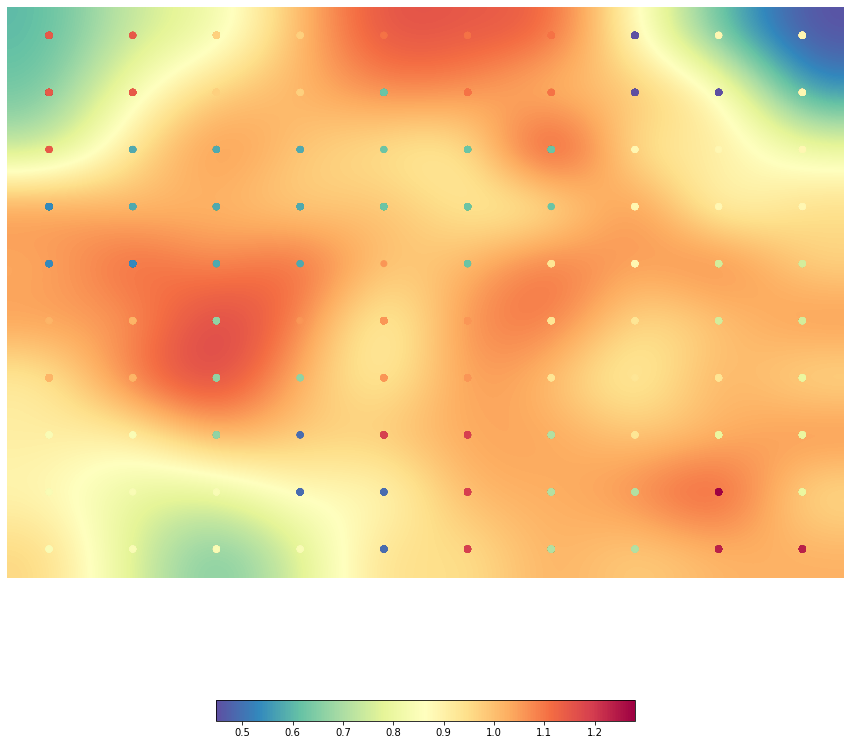

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som10.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som10.clusters)

[[16 16 12 12 15 15 15  0 10 10]
 [16 16 12 12  4 15 15  0  0 10]
 [16  3  3  3  4  4  4 10 10 10]
 [ 2  3  3  3  4  4  4 10 10 10]
 [ 2  2  3  3 14  4 11 10  7  7]
 [13 13  5 14 14 14 11 11  7  7]
 [13 13  5  5 14 14 11 11 11  8]
 [ 9  9  5  1 17 17  6 11  8  8]
 [ 9  9  9  1  1 17  6  6 19  8]
 [ 9  9  9  9  1 17  6  6 18 18]]


In [ ]:
clusters10_20, neurons_in_clusters10_20 = np.unique(som10.clusters, return_inverse=True)

In [ ]:
print(clusters10_20.shape)
print(neurons_in_clusters10_20.shape)

(20,)
(100,)


In [ ]:
appearences10_20 = np.bincount(neurons_in_clusters10_20)
sorted10_20 = np.argsort(appearences10_20)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters10_20)):
  if (clusters10_20[sorted10_20[19-i]]>9):
    print(" {}            | {}".format(clusters10_20[sorted10_20[19-i]], appearences10_20[sorted10_20[19-i]]))
  else :
    print(" {}             | {}".format(clusters10_20[sorted10_20[19-i]], appearences10_20[sorted10_20[19-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 10            | 10
 9             | 9
 4             | 8
 3             | 8
 11            | 7
 14            | 6
 15            | 5
 16            | 5
 6             | 5
 13            | 4
 12            | 4
 1             | 4
 8             | 4
 7             | 4
 5             | 4
 17            | 4
 2             | 3
 0             | 3
 18            | 2
 19            | 1


#### 25 clusters

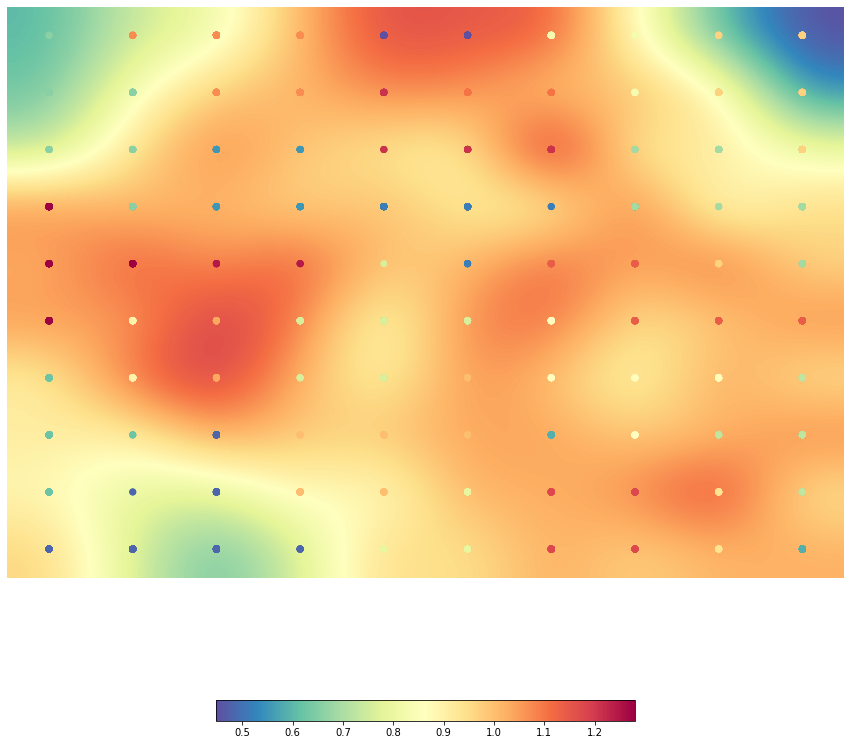

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som10.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som10.clusters)

[[ 6 18 18 18  0  0 11 11 15 15]
 [ 6  6 18 18 22 19 19 11 15 15]
 [ 6  6  3  3 22 22 22  7  7 15]
 [24  6  3  3  2  2  2  7  7  7]
 [24 24 23 23  9  2 20 20 15  7]
 [24 13 17  9  9  9 12 20 20 20]
 [ 5 13 17  9  9 16 12 12 12  8]
 [ 5  5  1 16 16 16  4 12  8  8]
 [ 5  1  1 16 16 10 21 21 14  8]
 [ 1  1  1  1 10 10 21 21 14  4]]


In [ ]:
clusters10_25, neurons_in_clusters10_25 = np.unique(som10.clusters, return_inverse=True)

In [ ]:
print(clusters10_25.shape)
print(neurons_in_clusters10_25.shape)

(25,)
(100,)


In [ ]:
appearences10_25 = np.bincount(neurons_in_clusters10_25)
sorted10_25 = np.argsort(appearences10_25)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters10_25)):
  if (clusters10_25[sorted10_25[24-i]]>9):
    print(" {}            | {}".format(clusters10_25[sorted10_25[24-i]], appearences10_25[sorted10_25[24-i]]))
  else :
    print(" {}             | {}".format(clusters10_25[sorted10_25[24-i]], appearences10_25[sorted10_25[24-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 1             | 7
 9             | 6
 16            | 6
 15            | 6
 6             | 6
 7             | 6
 12            | 5
 20            | 5
 18            | 5
 2             | 4
 3             | 4
 5             | 4
 8             | 4
 24            | 4
 21            | 4
 22            | 4
 10            | 3
 11            | 3
 23            | 2
 13            | 2
 14            | 2
 17            | 2
 4             | 2
 19            | 2
 0             | 2


Κατ' αρχάς, παρατηρούμε γενικά ότι ο k-Means σέβεται τα όρια των περιοχών του χάρτη SOM. Αυτό συμβαίνει περισσότερο για τις μπλε περιοχές, ενώ για τις κόκκινες είναι πιο έντονη και συχνή η διαφορετική ομαδοποιήση των στοιχείων. Το γεγονός αυτό είναι λογικό, καθώς οι κόκκινες περιοχές είναι συνοριακές. Άρα, οι ταινίες που ανήκουν σε αυτές είναι πιθανό να δημιουργούν σύγχυση ως προς το είδος τους, γι'αυτό και διαχωρίζονται συχνότερα από τον k-Means.  

Σημειώνουμε μία αναμενόμενη διαφορά: με την αύξηση του αριθμού των clusters μειώθηκαν οι νευρώνες που ανήκουν στο ίδιο cluster. Θα μπορούσαμε να παρομοιάσουμε την αύξηση των clusters ως εντοπισμό υποκατηγοριών. Δηλαδή, ο πρώτος χάρτης είχε σε κοινό cluster τα πάνω αριστερά στοιχεία, κατατάσσοντάς τα στην ίδια κατηγορία ταινιών. Ο δεύτερος χάρτης τα διαχώρισε, εντοπίζοντας κάποια διαφορά μεταξύ τους, άρα βρίσκοντας κάποιες υποκατηγορίες.

### **20x20**

#### 20 clusters

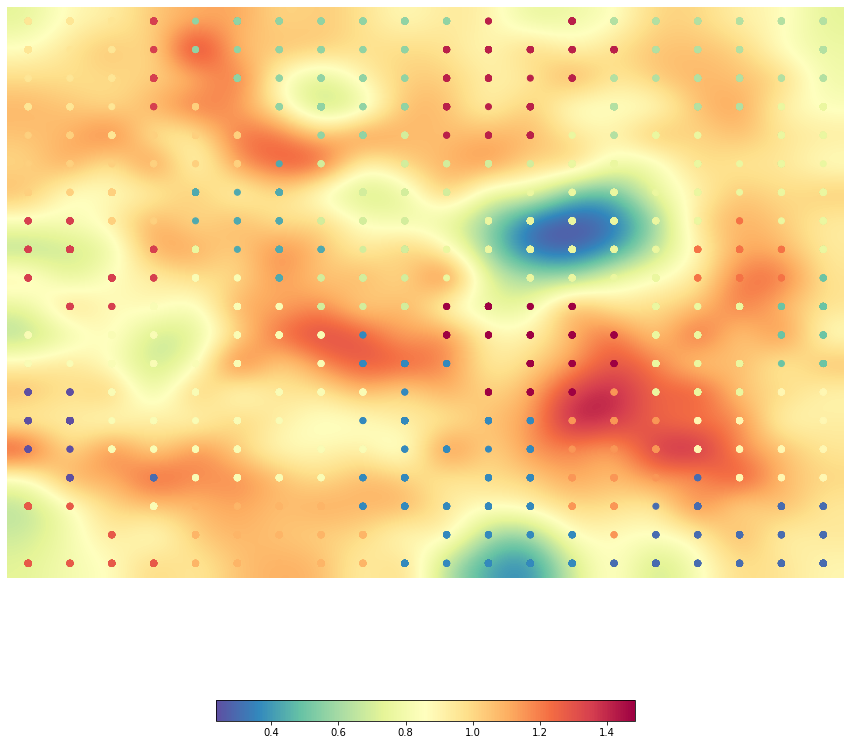

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som20.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som20.clusters)

[[11 11 11 17  5  5  5  5  5  5  5 18 18 18  6  6  6  6  6  6]
 [11 11 11 17  5  5  5  5  5  5 18 18 18 18 18  6  6  6  6  6]
 [11 11 11 17 17  5  5  5  5  5 18 18 18 18  6  6  6  6  6  6]
 [11 11 11 17 12  5  5  5  5  5 18 18 18  6  6  6  6  6  8  8]
 [12 12 11 12 12 12  7  5  5  7 18 18 18  8  6  8  8  8  8  8]
 [12 12 12 12 12 12  3  7  7  7  7  7  7  8  8  8  8  8  8  8]
 [12 12 12 12  3  3  3  7  7  7  7  8  8  8  8  8  8  8  8  8]
 [17 17 12 12  3  3  3  7  7  7  8  8  8  8  8  8  8 15  8  8]
 [17 17 17 17  8  3  3  3  7  7  8  8  8  8  8  8 15 15 15  8]
 [17 17 17 17  9  9  3  7  7  7  8 19  8  8  8  8 15 15 15  4]
 [ 9 17 17  9  9  9  9  7  7  7 19 19 19 19  8  8  8  8  4  4]
 [ 9  9  9  9  9  9  9  9  2  2 19 19 19 19 19  8  8  8  4  4]
 [ 9  9  9  9  9  9  9  9  2  2  2 19 19 19 19  8  8  8  4  4]
 [ 0  0  9  9  9  9  9  9  9  2 19 19 19 19 14  8  8  8 10 10]
 [ 0  0  9  9  9  9  9  9  2  2  2  2  2 14 14 14 10 10 10 10]
 [ 0  0  9  9  9  9  9  9  9  2  2  2  2 14 14 14 10 10

In [ ]:
clusters20_20, neurons_in_clusters20_20 = np.unique(som20.clusters, return_inverse=True)

In [ ]:
print(clusters20_20.shape)
print(neurons_in_clusters20_20.shape)

(20,)
(400,)


In [ ]:
appearences20_20 = np.bincount(neurons_in_clusters20_20)
sorted20_20 = np.argsort(appearences20_20)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters20_20)):
  if (clusters20_20[sorted20_20[19-i]]>9):
    print(" {}            | {}".format(clusters20_20[sorted20_20[19-i]], appearences20_20[sorted20_20[19-i]]))
  else :
    print(" {}             | {}".format(clusters20_20[sorted20_20[19-i]], appearences20_20[sorted20_20[19-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 8             | 59
 9             | 48
 2             | 35
 5             | 25
 6             | 23
 7             | 23
 18            | 18
 1             | 18
 19            | 18
 12            | 18
 17            | 17
 13            | 14
 10            | 13
 11            | 13
 14            | 13
 16            | 13
 3             | 11
 15            | 7
 4             | 7
 0             | 7


#### 25 clusters

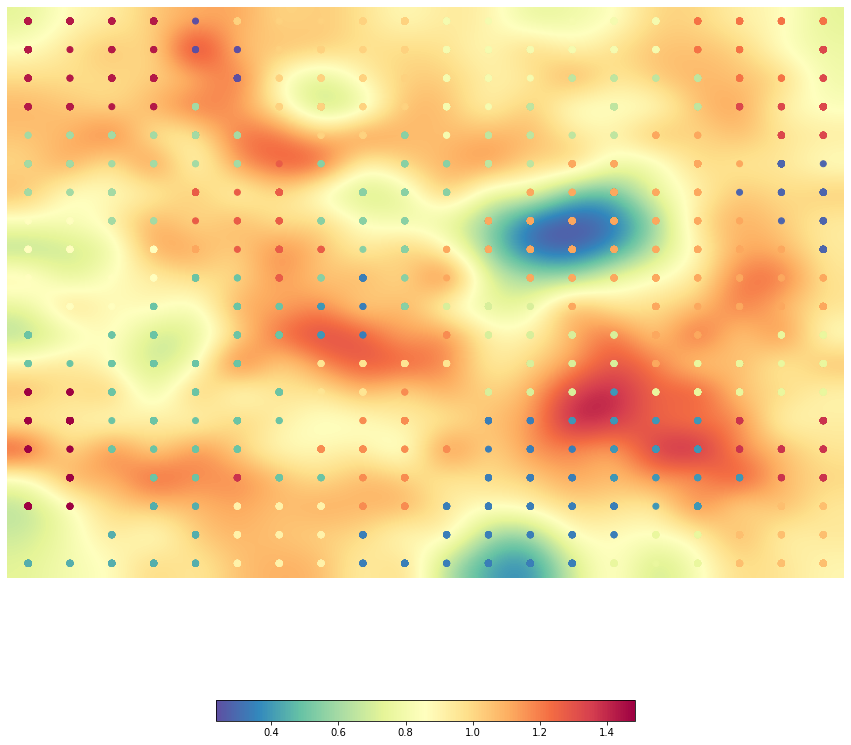

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som20.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som20.clusters)

[[23 23 23 23  0 15 15 15 15 15 11 11 11 11 11 11 19 19 19 19]
 [23 23 23 23  0  0 15 15 15 15 11 11 11 11 11 11 19 19 19 21]
 [23 23 23 23  0  0 15 15 15 15 11 11 11  8  8  8  8 19 19 21]
 [23 23 23 23  7  0 15 15 15 15 11 11  8  8  8  8  8 21 21 21]
 [ 7  7  7  7  7  7  0 15 15  6 11  8  8  8  8 17 17 21 21 21]
 [ 7  7  7  7  7  7 20  6  6  6  6  8  8 17 17 17 17 17  1  1]
 [ 7  7  7  7 20 20 20  6  6  6  6 17 17 17 17 17 17  1  1  1]
 [12 12  7  7 20 20 20  6  6  6 17 17 17 17 17 17 17 17  1  1]
 [12 12 12 12 17 20 20 20  6  6 17 17 17 17 17 17 17 17 17  1]
 [12 12 12 12  5  5 20  6  2  6 17 17 17 17 17 17 17 17 17 17]
 [ 5 12 12  5  5  5  5  3  2  6  9  9  9 17 17 17 17 17 17 17]
 [ 5  5  5  5  5  5  5  3  2 18 18  9  9  9  9 17 17 17 10 10]
 [ 5  5  5  5  5  5  5 14 14 14 14  9  9  9  9 17 10 10 10 10]
 [24 24  5  5  5  5  5 14 14 18  9  9  9  9  3 10 10 10 10 10]
 [24 24  5  5  5  5  5 14 18 18 18  2  2  3  3  3  3 22 22 22]
 [24 24  5  5  5  5  5 18 18 18 18  2  2  2  3  3  3 22

In [ ]:
clusters20_25, neurons_in_clusters20_25 = np.unique(som20.clusters, return_inverse=True)

In [ ]:
print(clusters20_25.shape)
print(neurons_in_clusters20_25.shape)

(25,)
(400,)


In [ ]:
appearences20_25 = np.bincount(neurons_in_clusters20_25)
sorted20_25 = np.argsort(appearences20_25)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters20_25)):
  if (clusters20_25[sorted20_25[24-i]]>9):
    print(" {}            | {}".format(clusters20_25[sorted20_25[24-i]], appearences20_25[sorted20_25[24-i]]))
  else :
    print(" {}             | {}".format(clusters20_25[sorted20_25[24-i]], appearences20_25[sorted20_25[24-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 17            | 52
 5             | 40
 2             | 29
 15            | 19
 7             | 19
 11            | 18
 6             | 17
 3             | 16
 23            | 16
 10            | 16
 9             | 15
 18            | 15
 8             | 15
 24            | 12
 4             | 12
 12            | 12
 20            | 11
 13            | 9
 16            | 9
 19            | 9
 22            | 9
 21            | 8
 1             | 8
 14            | 7
 0             | 7


Το μεγαλύτερο μέγεθος πλέγματος μας δίνει περισσότερο ξεκάθαρες περιοχές στο χάρτη SOM. 

Το clustering συνεχίζει να σέβεται την κατηγοριοποίηση του SOM. Όπως σημειώθηκε παραπάνω, οι συνοριακές (κόκκινες) περιοχές είναι αυτές που συγκεντρώνουν την έντονη εναλλαγή των clusters.

Τέλος, σε σχέση με το μικρότερο μέγεθος πλέγματος, βλεπουμε σημαντική διαφορά στον χάρτη SOM (οι μπλε και κόκκινες περιοχές έχουν μετακινηθεί).

### **25x25**

#### 20 clusters

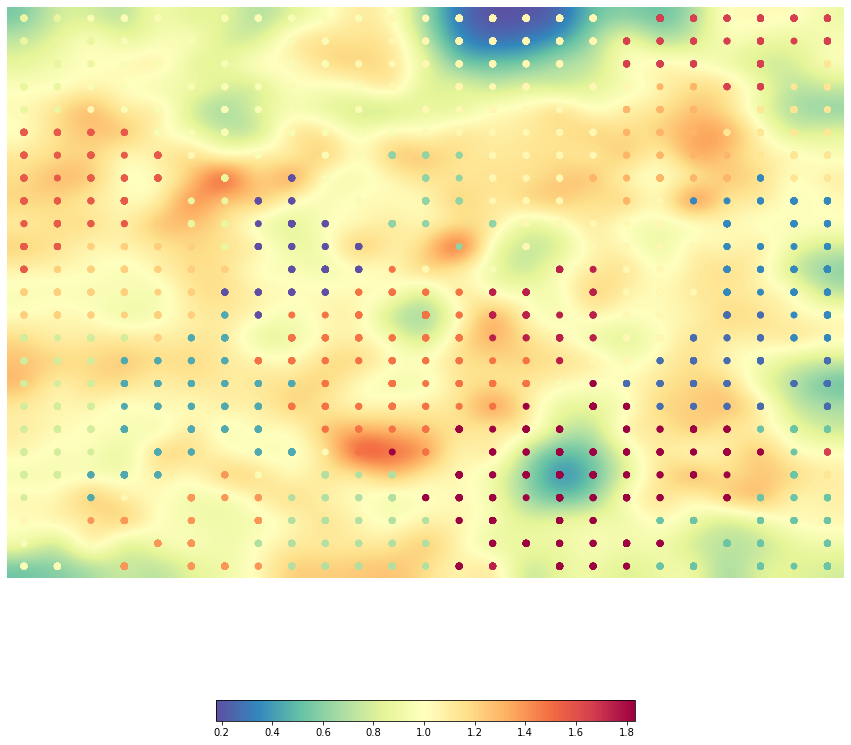

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som25.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som25.clusters)

[[ 8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 17 17 17 17 17
  17]
 [ 8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 17 17 17 17 17 17
  17]
 [ 8  8  8  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 17 17 17 17 17 17
  11]
 [ 8  8  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 13 13 17 17 11
  11]
 [ 8  8 10  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 13 13 13 13 11 11
  11]
 [16 16 16 16  9  9  9  9  9  9  9  9 10 10 10 10 10 10 13 13 13 11 11 11
  11]
 [16 16 16 16 16 10  9  9  9  9  9  5  5  5 10 10 10 10 13 13 13 13 11 11
  11]
 [16 16 16 16 16  8  8  9  0  9  9  9  5  5 10 10 10 13 13 13 13 13  2 11
  11]
 [16 16 16 16 16  8  8  0  0  9  9  5  5  5 10 10 10 10 13 10  2  2  2  2
   2]
 [16 16 16 16 12  8  8  0  0  0 10  5  5  5  5 10 10 10 10 10 10  2  2  2
   2]
 [16 16 12 12 12 12  8  0  0  0  0 10 10  5 18 10 10 10 10 10 10  2  2  2
   2]
 [16 12 12 12 12 12 12  0  0  0  0 15 10  9  9 18 18 18 10 10  2  2  2  2
   2]
 [12 12 12 12 12 12  0  0  0  0 15 15 15

In [ ]:
clusters25_20, neurons_in_clusters25_20 = np.unique(som25.clusters, return_inverse=True)

In [ ]:
print(clusters25_20.shape)
print(neurons_in_clusters25_20.shape)

(20,)
(625,)


In [ ]:
appearences25_20 = np.bincount(neurons_in_clusters25_20)
sorted25_20 = np.argsort(appearences25_20)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters25_20)):
  if (clusters25_20[sorted25_20[19-i]]>9):
    print(" {}            | {}".format(clusters25_20[sorted25_20[19-i]], appearences25_20[sorted25_20[19-i]]))
  else :
    print(" {}             | {}".format(clusters25_20[sorted25_20[19-i]], appearences25_20[sorted25_20[19-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 10            | 88
 9             | 74
 19            | 63
 15            | 47
 3             | 34
 2             | 27
 16            | 26
 4             | 26
 1             | 25
 12            | 24
 6             | 23
 17            | 22
 7             | 22
 14            | 20
 8             | 19
 13            | 19
 0             | 19
 18            | 18
 11            | 16
 5             | 13


#### 25 clusters

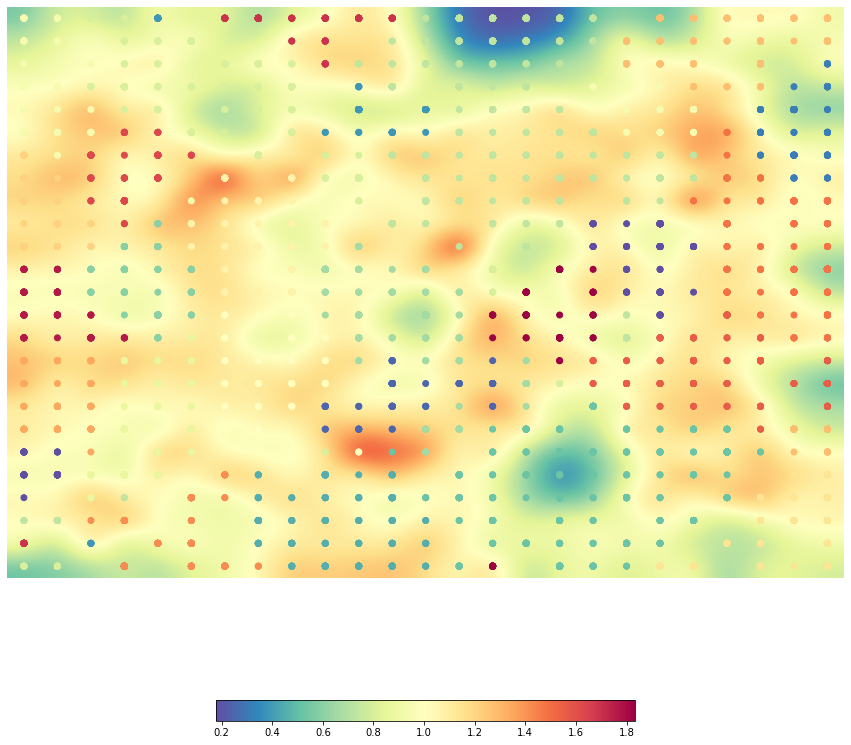

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som25.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som25.clusters)

[[11 11  9  9  3  9 22 22 22 22 22 22  8  8  8  8  8  8 16 16 16 16 16 16
  16]
 [11 11 11  9  9  9  9 22 22 22 22  8  8  8  8  8  8  8 16 16 16 16 16 16
  16]
 [11 11 11  9  9  9  9  9  9 22  8  8  8  8  8  8  8  8 16 16 16 16 16 16
   2]
 [11 11  9  9  9  9  9  9  9  9  3  8  8  8  8  8  8 11 11 11 16 16 16  2
   2]
 [11 11 11  9  9  9  9  9  9  3  3  3  3  8  8  8  8  8 11 11 11 16  2  2
   2]
 [11 11 11 21 21  9  9  9  9  3  3  3  3  8  8  8  8  8 11 11 11 19  2  2
   2]
 [15 11 21 21 21 21  9  9  9  9  9  8  8  8  8  8  8  8  8  8  8 19  2  2
   2]
 [15 15 21 21 21 21 13  9 13  9  9  9  8  8  8  8  8  8  8  8  8 19 19  2
   2]
 [15 15 21 21 21 11 13 13 13  9  9  8  8  8  8  8  8  8  8  8 19 19 19 19
  19]
 [15 15 15 21  6 13 13 13 13 13  8  8  8  8  8  8  8  0  0  0  0 19 19 19
  19]
 [15 15 15  6  6 13 13 13 13 13  7  8  8  8  9  8  8  0  0  0  0 19 19 19
  19]
 [23 23  6  6  6  6 13 13 13  7  7  7  7  9  9 24 24 24  0  0  0 19 19 19
  19]
 [23 23  6  6  6  6 13 13 13  7  7  7  7

In [ ]:
clusters25_25, neurons_in_clusters25_25 = np.unique(som25.clusters, return_inverse=True)

In [ ]:
print(clusters25_25.shape)
print(neurons_in_clusters25_25.shape)

(25,)
(625,)


In [ ]:
appearences25_25 = np.bincount(neurons_in_clusters25_25)
sorted25_25 = np.argsort(appearences25_25)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters25_25)):
  if (clusters25_25[sorted25_25[24-i]]>9):
    print(" {}            | {}".format(clusters25_25[sorted25_25[24-i]], appearences25_25[sorted25_25[24-i]]))
  else :
    print(" {}             | {}".format(clusters25_25[sorted25_25[24-i]], appearences25_25[sorted25_25[24-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 8             | 82
 5             | 61
 9             | 54
 20            | 30
 19            | 30
 7             | 29
 16            | 28
 11            | 27
 4             | 26
 12            | 25
 13            | 21
 0             | 21
 14            | 21
 10            | 20
 18            | 18
 24            | 16
 6             | 15
 1             | 15
 21            | 14
 2             | 14
 17            | 13
 22            | 12
 23            | 11
 15            | 11
 3             | 11


Παρατηρούμε ότι όσο αυξάνουμε το μέγεθος του πλέγματος, ο χάρτης SOM γίνεται ακόμα πιο ξεκάθαρος. Αρχίζει, όμως, να γίνεται κατανοητή η ανάγκη για περισσότερα clusters. Ο χάρτης SOM δίνει διαφορετικές περιοχές, ενώ τα clusters δεν μπορούν να τις διακρίνουν. Με άλλα λόγια, ο χάρτης αποκτά δυνατότητα διαχωρισμού υποκατηγοριών που τα clusters δεν μπορούν να ακολουθήσουν. 

### **30x30**

#### 25 clusters

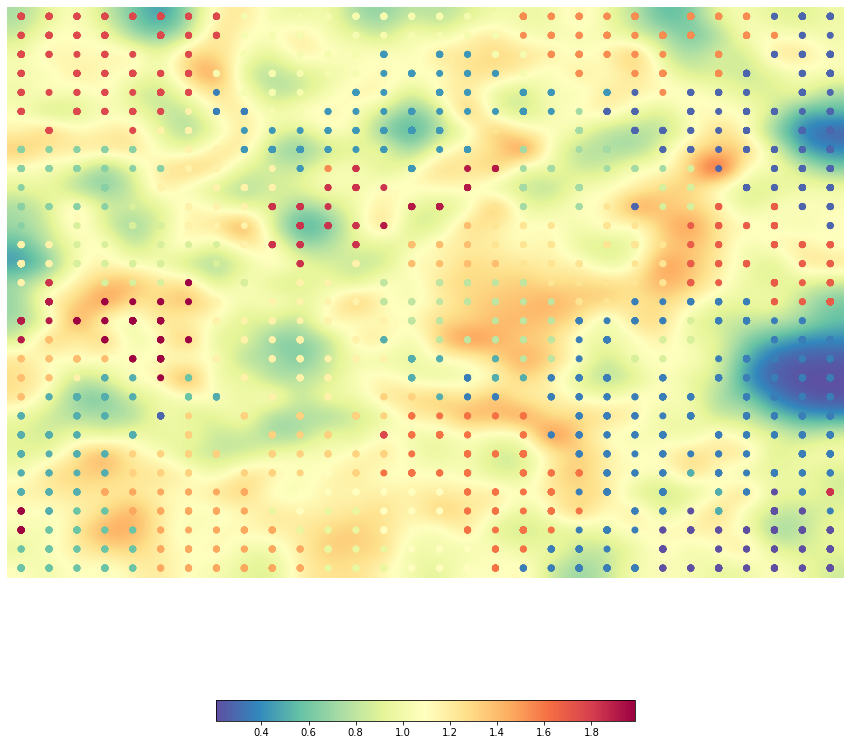

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som30.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som30.clusters)

[[21 21 21 21 21 21 21 21 11 11 11 11 11 11 11 11 11 11 18 18 18 18 18 18
  18 18 18  1  1  1]
 [21 21 21 21 21 21 21 21 11 11 11 11 11 11 11 11 11 11 18 18 18 18 18 18
  18 18 18 18  1  1]
 [21 21 21 21 21 21 21 11 11 11 11 11 11  3  3  3  3 11 11 18 18 18 18 18
  18 18 18  1  1  1]
 [21 21 21 21 21 21 21 11 11 11 11 11 11  3  3  3  3  3 11 18 18 18 18 18
  18 18  1  1  1  1]
 [21 21 21 21 21 21 21  2 11 11 11 11  3  3  3  3  3  3  3  3 18  3  1 18
   1  1  1  1  1  1]
 [21 21 21 21 21 21 13  2  2 11 11  3  3  3  3  3  3  3  3  3  7  1  1  1
   1  1  1  1  1  1]
 [21 21 21 21 21 13 13 13  3  3  3  3  3  3  3  3  3 14  3  7  7  7  1  1
   1  1  1  1  1  1]
 [ 6  6  6  6  6  6 13 13  3  3  3  3  3  3  3  3  3 14  7  7  7  7  7  1
   1  1  1  1  1  1]
 [ 6  6  6  6  6  6 13 13 13 13  3 18 22  3  3  3 23 23  7  7  7  7  7  7
   9  1  1  1  1  1]
 [ 6  6  6  6  6 13 13 13 13 13 22 22 22 22 22 23 23 23  7  7  7  7  7  9
   9  1  1  1  1  1]
 [ 6  6  6  6  9 13 13 13 13 22 22 22 22 23 23 23 

In [ ]:
clusters30_25, neurons_in_clusters30_25 = np.unique(som30.clusters, return_inverse=True)

In [ ]:
print(clusters30_25.shape)
print(neurons_in_clusters30_25.shape)

(25,)
(900,)


In [ ]:
appearences30_25 = np.bincount(neurons_in_clusters30_25)
sorted30_25 = np.argsort(appearences30_25)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters30_25)):
  if (clusters30_25[sorted30_25[24-i]]>9):
    print(" {}            | {}".format(clusters30_25[sorted30_25[24-i]], appearences30_25[sorted30_25[24-i]]))
  else :
    print(" {}             | {}".format(clusters30_25[sorted30_25[24-i]], appearences30_25[sorted30_25[24-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 2             | 120
 13            | 74
 1             | 59
 3             | 50
 21            | 49
 4             | 43
 11            | 41
 19            | 40
 15            | 38
 18            | 37
 9             | 35
 14            | 30
 20            | 29
 17            | 28
 8             | 26
 0             | 26
 22            | 24
 7             | 23
 6             | 23
 12            | 20
 5             | 19
 24            | 19
 23            | 18
 16            | 17
 10            | 12


#### 30 clusters

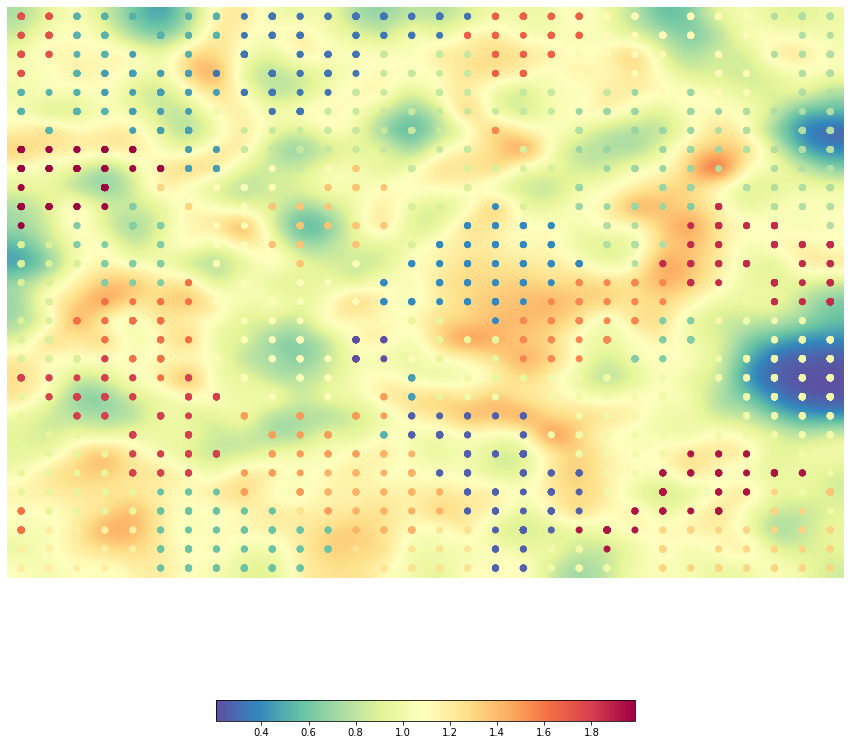

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som30.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [ ]:
print(som30.clusters)

[[25 25  5  5  5  5  5  5  2  2  2  2  2  2  2  2  2 24 24 24 24 15 15 15
  15 15 15  9  9  9]
 [25 25  5  5  5  5  5  5  2  2  2  2  2  2  2  2 24 24 24 24 24 15 15 15
  15 15 15 15  9  9]
 [25 25  5  5  4  5  5  2  2  2  2  2  2 10 10 10 10 24 24 24 15 15 15 15
  15 15 15  9  9  9]
 [25 25  5  4  4  4  4  2  2  2  2  2  2 10 10 10 10 24 24 24 15 15 15 15
  15 15 15  9  9  9]
 [ 5  5  5  4  4  4  4  4  2  2  2  2 10 10 10 10 10 10 10 10 10 10  8 15
   8 15 15  9  9  9]
 [ 5  5  5  5  4  4  4 13 13  2  2 10 10 10 10 10 10 10 10 10  8  8  8  8
   8  8  9  9  9  9]
 [ 5  5  5  4  4  4  4  4 10 10 10 10 10 10 10 10 10 22 10  9  9  8  8  8
   8  9  9  9  9  9]
 [29 29 29 29 29 29  4  4 10 10 10 10 10 10 10 10 10 22 11 11  8  8  8  8
   8  8  9  9  9  9]
 [29 29 29 29 29 29  4  4 14 14 10 15 19 10 10 10 11 11 11 11  8  8  8  8
   8  9  9  9  9  9]
 [29 29 29 29 29 18 14 14 14 14 19 19 19 19 19 11 11 11 11 11  8  8  8  8
   8  9  9  9  9  9]
 [29 29 29 29  7 14 18 14 14 19 19 19 19 11 11 11 

In [ ]:
clusters30_30, neurons_in_clusters30_30 = np.unique(som30.clusters, return_inverse=True)

In [ ]:
print(clusters30_30.shape)
print(neurons_in_clusters30_30.shape)

(30,)
(900,)


In [ ]:
appearences30_30 = np.bincount(neurons_in_clusters30_30)
sorted30_30 = np.argsort(appearences30_30)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index  | Number of neurons ")
print("---------------------------------------------------")
for i in range(len(clusters30_30)):
  if (clusters30_30[sorted30_30[29-i]]>9):
    print(" {}            | {}".format(clusters30_30[sorted30_30[29-i]], appearences30_30[sorted30_30[29-i]]))
  else :
    print(" {}             | {}".format(clusters30_30[sorted30_30[29-i]], appearences30_30[sorted30_30[29-i]]))

Clusters sorted by increasing number of neurons:
Cluster index  | Number of neurons 
---------------------------------------------------
 13            | 89
 14            | 60
 9             | 51
 10            | 50
 11            | 39
 1             | 38
 12            | 36
 2             | 35
 26            | 35
 3             | 34
 8             | 33
 15            | 31
 6             | 28
 27            | 28
 5             | 28
 18            | 27
 21            | 25
 4             | 25
 22            | 24
 7             | 24
 29            | 23
 28            | 22
 19            | 22
 20            | 18
 23            | 18
 24            | 15
 16            | 14
 17            | 14
 25            | 8
 0             | 6


Στην περίπτωση αυτή, κινηθήκαμε σε μεγέθη clusters 25, 30 γιατί τα 20 ήταν πολύ λίγα. Παρατηρώντας ακόμα και την περίπτωση των 25 clusters βλέπουμε να υπάρχει σύγχυση κατηγοριών σχετικά ευδιάκριτων μέσω του χάρτη SOM. Σημειώνουμε ότι η σύγχυση γίνεται στις όχι τόσο έντονα μπλε ή κόκκινες περιοχές.

Συγκρίνοντας τα διάφορα μεγέθη χαρτών, βλέπουμε ότι αλλάζουν οι περιοχές που είναι πιο έντονα κόκκινες ή μπλε. Αυτό είναι λογικό, καθώς όσο δίνουμε τη δυνατότητα για επιπλέον υποκατηγοριοποίηση, σπάμε μεγάλες κατηγορίες με αποτέλεσμα άλλες να είναι τώρα αυτές με τα περισσότερα στοιχεία.


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [ ]:
import numpy as np

def print_categories_stats(movie_ids):
  
  all_categories = []
  for id in movie_ids:
    l = [ct.strip() for ct in categories[id][0].split(',')]
    all_categories.extend(l)
  all_categories, freqs = np.unique(all_categories, return_counts=True)
  
  sorted = np.argsort(freqs)
 
  print_list=[]
  for i in sorted[::-1]:
    print_list.append((all_categories[i], freqs[i]))
  print(print_list)


In [ ]:
def print_cluster_neurons_movies_report(cluster):
  
  #getting cluster's coordinates
  x, y = np.where(som.clusters==cluster)
  #creating the bmus array
  cluster_bmus = np.column_stack((y, x))

  common_bmus = []
  for i in range(len(ubmus)):
    for j in cluster_bmus:
      if ubmus[i][0]==j[0] and ubmus[i][1]==j[1]:
        common_bmus.append(i)

  return common_bmus

In [ ]:
#doesnt say to have parameter cluster but it's convenient...
def neuron_movies_report(cluster):

  movies_indexes = print_cluster_neurons_movies_report(cluster)

  movies = []
  for i in movies_indexes:
    r, = np.where(indices == i)
    movies.extend(list(r))
  
  print_categories_stats(movies)

In [ ]:
#see the map, cluster 23, 5 are in blue region meaning they must represent a category
som = som30
ubmus = ubmus30
indices = indices30
neuron_movies_report(23)
neuron_movies_report(0)

[('"Documentary"', 126), ('"Culture & Society"', 23), ('"Biography"', 23), ('"Short Film"', 22), ('"Indie"', 16), ('"Music"', 11), ('"Rockumentary"', 10), ('"Social issues"', 8), ('"History"', 7), ('"Political cinema"', 7), ('"World cinema"', 7), ('"Sports"', 7), ('"Drama"', 6), ('"War film"', 6), ('"Biographical film"', 5), ('"Crime Fiction"', 4), ('"Adventure"', 3), ('"Political drama"', 3), ('"Silent film"', 3), ('"Travel"', 2), ('"Health & Fitness"', 2), ('"Law & Crime"', 2), ('"Historical drama"', 2), ('"Science Fiction"', 2), ('"Extreme Sports"', 1), ('"Environmental Science"', 1), ('"Business"', 1), ('"Family Film"', 1), ('"Biopic [feature]"', 1), ('"Crime Thriller"', 1), ('"Comedy film"', 1), ('"Clay animation"', 1), ('"Christian film"', 1), ('"Family & Personal Relationships"', 1), ('"Horror"', 1), ('"Filipino Movies"', 1), ('"Media Studies"', 1), ('"Tamil cinema"', 1), ('"Propaganda film"', 1), ('"News"', 1), ('"Mystery"', 1), ('"Musical"', 1), ('"Mockumentary"', 1), ('"Langu

In [ ]:
#whereas 2, 14 are at a red region => undecisive results
neuron_movies_report(2)
neuron_movies_report(14)

[('"Comedy"', 58), ('"Family Film"', 43), ('"Animation"', 33), ('"Short Film"', 26), ('"Adventure"', 15), ('"Children\'s/Family"', 13), ('"Children\'s"', 6), ('"Fantasy"', 6), ('"Slapstick"', 4), ('"Science Fiction"', 4), ('"Family-Oriented Adventure"', 3), ('"Animal Picture"', 3), ('"Children\'s Fantasy"', 3), ('"Fantasy Comedy"', 2), ('"Domestic Comedy"', 2), ('"Fantasy Adventure"', 2), ('"Mystery"', 2), ('"Road movie"', 2), ('"Sports"', 2), ('"Teen"', 2), ('"Computer Animation"', 2), ('"Black comedy"', 1), ('"Auto racing"', 1), ('"Animated cartoon"', 1), ('"Christmas movie"', 1), ('"War film"', 1), ('"Crime Fiction"', 1), ('"Drama"', 1), ('"Fairy tale"', 1), ('"Thriller"', 1), ('"Live action"', 1), ('"Musical"', 1), ('"Parody"', 1), ('"Romance Film"', 1), ('"Satire"', 1), ('"Spy"', 1), ('"Action"', 1)]
[('"Western"', 37), ('"Action/Adventure"', 35), ('"Drama"', 13), ('"Action"', 11), ('"Comedy"', 7), ('"Film adaptation"', 5), ('"Adventure"', 5), ('"Revisionist Western"', 5), ('"Tele


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix. ???
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


Ορίζουμε σαν τελικό χάρτη SOM από εκείνους που δημιουργήσαμε, τον χάρτη με μέγεθος πλέγματος 30. Η εν λόγω εφαρμογή κατηγοριοποιεί εγγενώς τις ταινίες σε πολλά διαφορετικά είδη. Συνεπώς, για να μπορούμε να προβλέψουμε σωστά τα labels θέλουμε να υπάρχουν όσο το δυνατόν περισσότερες περιοχές-clusters. Όπως έχουμε ήδη παρατηρήσει, η μέγαλη ανάλυση σε επιμέρους κατηγορίες γίνεται όσο αυξάνουμε το μέγεθος του πλέγματος του χάρτη SOM.

In [ ]:
#1

#pdf of all the categories in dataset 
print_categories_stats(range(5000))

[('"Drama"', 2275), ('"Comedy"', 1271), ('"Romance Film"', 814), ('"Thriller"', 746), ('"Action"', 723), ('"World cinema"', 598), ('"Crime Fiction"', 521), ('"Horror"', 465), ('"Indie"', 453), ('"Action/Adventure"', 448), ('"Black-and-white"', 437), ('"Adventure"', 411), ('"Family Film"', 369), ('"Short Film"', 350), ('"Romantic drama"', 314), ('"Musical"', 304), ('"Science Fiction"', 282), ('"Mystery"', 273), ('"Animation"', 269), ('"Romantic comedy"', 240), ('"Fantasy"', 230), ('"Comedy film"', 227), ('"War film"', 188), ('"Crime Thriller"', 176), ('"Japanese Movies"', 153), ('"Period piece"', 151), ('"Silent film"', 147), ('"Documentary"', 144), ('"Bollywood"', 144), ('"Western"', 143), ('"Film adaptation"', 142), ('"Psychological thriller"', 140), ('"Comedy-drama"', 139), ('"Chinese Movies"', 122), ('"Black comedy"', 106), ('"Teen"', 102), ('"Family Drama"', 95), ('"Television movie"', 90), ('"Children\'s/Family"', 90), ('"Martial Arts Film"', 88), ('"Slasher"', 84), ('"Biography"'

Βλέπουμε παραπάνω τις κατηγορίες που εμφανίζονται στο σύνολο δεδομένων κατά σειρά συχνότητας (από τη μεγαλύτερη πυκνότητα πιθανότητας-ποσοστό εμφάνισης στη μικρότερη). Για να επιβεβαιώσουμε την παρατήρηση 1, θα εξετάσουμε τα clustersμε τους περισσότερους και του λιγότερους νευρώνες στο χάρτη της επιλογής μας.

In [ ]:
som = som30
ubmus = ubmus30
indices = indices30
#the first 3 clusters with the most neurons are 13,14 and 9
neuron_movies_report(13)
neuron_movies_report(14)
neuron_movies_report(9)

[('"Drama"', 747), ('"Crime Fiction"', 77), ('"Indie"', 68), ('"Black-and-white"', 61), ('"Period piece"', 47), ('"Biographical film"', 45), ('"Biography"', 37), ('"Film adaptation"', 36), ('"Television movie"', 29), ('"Biopic [feature]"', 28), ('"Family Drama"', 27), ('"Musical"', 25), ('"Melodrama"', 21), ('"Adventure"', 20), ('"War film"', 18), ('"Political drama"', 18), ('"Mystery"', 17), ('"Short Film"', 16), ('"Coming of age"', 15), ('"Docudrama"', 14), ('"Sports"', 13), ('"Documentary"', 12), ('"Crime Drama"', 12), ('"Historical fiction"', 11), ('"Japanese Movies"', 10), ('"Film noir"', 10), ('"Chinese Movies"', 9), ('"World cinema"', 9), ('"Teen"', 9), ('"History"', 8), ('"Comedy film"', 8), ('"Costume drama"', 8), ('"Courtroom Drama"', 8), ('"Crime Thriller"', 8), ('"Romantic drama"', 8), ('"Action/Adventure"', 8), ('"Science Fiction"', 7), ('"Fantasy"', 7), ('"Silent film"', 6), ('"Marriage Drama"', 6), ('"Historical drama"', 6), ('"Gangster Film"', 6), ('"Juvenile Delinquenc

In [ ]:
#the clusters with the less neurons are 17, 25, 0
neuron_movies_report(17)
neuron_movies_report(25)
neuron_movies_report(0)

[('"Thriller"', 68), ('"Crime Fiction"', 64), ('"Crime Thriller"', 58), ('"Drama"', 52), ('"Mystery"', 43), ('"Detective"', 18), ('"Detective fiction"', 17), ('"Black-and-white"', 14), ('"Film noir"', 10), ('"Indie"', 10), ('"Gangster Film"', 9), ('"Film adaptation"', 8), ('"Comedy"', 7), ('"World cinema"', 7), ('"Action"', 6), ('"Crime Drama"', 6), ('"Suspense"', 6), ('"Period piece"', 4), ('"Courtroom Drama"', 4), ('"Psychological thriller"', 3), ('"Heist"', 3), ('"Supernatural"', 3), ('"Spy"', 3), ('"Caper story"', 3), ('"Romantic drama"', 3), ('"Action/Adventure"', 3), ('"Neo-noir"', 3), ('"Japanese Movies"', 2), ('"Erotic thriller"', 2), ('"New Hollywood"', 2), ('"Cult"', 2), ('"Comedy-drama"', 2), ('"Television movie"', 2), ('"Romance Film"', 2), ('"Crime Comedy"', 2), ('"Satire"', 2), ('"Horror"', 2), ('"Art film"', 1), ('"Comedy Thriller"', 1), ('"Buddy film"', 1), ('"Adventure"', 1), ('"Blaxploitation"', 1), ('"B-movie"', 1), ('"Western"', 1), ('"Chase Movie"', 1), ('"Domestic

Παρατηρούμε ότι το Drama και το Comedy που έχουν μεγάλη πυκνότητα πιθανότητας στο χώρο εισόδου κυριαρχούν στους νευρώνες, καθώς βλέπουμε ότι απεικονίζεται στο cluster με το μεγαλύτερο πλήθος νευρώνων και μάλιστα έχουν τους περισσότερους νευρώνες σε αυτό .

Αντίστοιχα σε αυτά με το μικρότερο πλήθος νευρώνων συναντάμε είδη όπως το Thriller, Slasher, Chinese Movies τα οποία είναι πολύ σπάνια. Επίσης, σε αυτήν την περίπτωση, τα clusters δεν είναι ξεκάθαρα τοποθετημένα σε μία κατηγορία. Δηλαδή, τόσο το Slasher όσο και το Horror έχουν 77 νευρώνες στο cluster 25.

In [ ]:
#2
som = som10
ubmus = ubmus10
indices = indices10
#choosing clusters that are far on the map to find categories that tend to be apart 
neuron_movies_report(10)
neuron_movies_report(9)
#indeed Documentary and Action films are very different
#however notice Comedy and Comedy film!

[('"Documentary"', 105), ('"Comedy film"', 74), ('"Silent film"', 64), ('"Black-and-white"', 60), ('"Science Fiction"', 59), ('"Adventure"', 52), ('"Japanese Movies"', 48), ('"Crime Fiction"', 35), ('"Fantasy"', 34), ('"Musical"', 31), ('"Indie"', 30), ('"Culture & Society"', 25), ('"Biography"', 25), ('"War film"', 25), ('"Chinese Movies"', 21), ('"Western"', 17), ('"Bollywood"', 16), ('"World cinema"', 16), ('"Mystery"', 14), ('"Comedy-drama"', 14), ('"Music"', 14), ('"Film noir"', 11), ('"Biographical film"', 11), ('"Rockumentary"', 9), ('"History"', 9), ('"Action/Adventure"', 9), ('"Social issues"', 8), ('"Romantic comedy"', 8), ('"Martial Arts Film"', 8), ('"Sports"', 8), ('"Anime"', 8), ('"Historical fiction"', 7), ('"Political cinema"', 7), ('"Family Film"', 7), ('"Cult"', 7), ('"Black comedy"', 6), ('"Filipino Movies"', 6), ('"Costume drama"', 5), ('"Historical drama"', 5), ('"Romantic drama"', 5), ('"Television movie"', 5), ('"Children\'s"', 4), ('"Drama"', 4), ('"Short Film"'

Επιλέγουμε στον μικρότερο χάρτη (μέγεθος πλέγματος 10) clusters σε δύο απομακρυσμένες περιοχές του (πάνω δεξιά και κάτω αριστερά). Τα δύο αυτά clusters χαρακτηρίζονται ως Documentary και Action/Adventure. Παρατηρούμε ότι τα δύο αυτά είδη είναι σημασιολογικά πολύ διαφορετικά. Άρα, αυτός ο διαχωρισμός είναι λογικός και μας ενθαρρύνει σχετικά με τη λειτουργία του συστήματός μας.

In [ ]:
som = som20
ubmus = ubmus20
indices = indices20
neuron_movies_report(16)
neuron_movies_report(7)

[('"Action/Adventure"', 90), ('"Action"', 83), ('"Comedy"', 79), ('"Martial Arts Film"', 34), ('"World cinema"', 32), ('"Crime Fiction"', 30), ('"Chinese Movies"', 27), ('"Adventure"', 20), ('"Crime Comedy"', 18), ('"Drama"', 18), ('"Indie"', 14), ('"Parody"', 13), ('"Black comedy"', 10), ('"Heist"', 10), ('"Action Comedy"', 9), ('"Romance Film"', 9), ('"Gangster Film"', 8), ('"Romantic comedy"', 8), ('"Thriller"', 8), ('"Western"', 8), ('"War film"', 7), ('"Buddy film"', 7), ('"Satire"', 6), ('"Superhero movie"', 6), ('"Comedy-drama"', 6), ('"Fantasy"', 5), ('"Adventure Comedy"', 5), ('"Slapstick"', 5), ('"Wuxia"', 5), ('"Crime Thriller"', 4), ('"Comedy Western"', 4), ('"Musical"', 4), ('"Detective fiction"', 3), ('"Cult"', 3), ('"Teen"', 3), ('"Action Thrillers"', 3), ('"Mockumentary"', 3), ('"Spy"', 3), ('"Sports"', 3), ('"Period piece"', 3), ('"Detective"', 3), ('"Coming of age"', 2), ('"Crime Drama"', 2), ('"Media Satire"', 2), ('"Japanese Movies"', 2), ('"Family Film"', 2), ('"Bl

Ελέγχουμε απομακρυσμένες στο χάρτη περιοχές για λίγο μεγαλύτερο μέγεθος πλέγματος (20). Παρατηρούμε ότι και πάλι τα δύο αυτά είδη διαχωρίζονται (εδώ το Documentary δε χαρακτηρίζει το cluster αλλά αυτό είναι λογικό, καθώς είναι πολύ συγκεκριμένο είδος ταινίας).

In [ ]:
#3: finding similar kinds of movies (they are close on the map)
som = som30
ubmus = ubmus30
indices = indices30
neuron_movies_report(25)
neuron_movies_report(5)

[('"Slasher"', 77), ('"Horror"', 77), ('"Thriller"', 24), ('"Teen"', 23), ('"Cult"', 20), ('"Indie"', 13), ('"B-movie"', 13), ('"Psychological thriller"', 10), ('"Comedy"', 10), ('"Supernatural"', 10), ('"Horror Comedy"', 7), ('"Crime Fiction"', 4), ('"Drama"', 4), ('"Black comedy"', 4), ('"Mystery"', 3), ('"Gothic Film"', 2), ('"Creature Film"', 2), ('"World cinema"', 2), ('"Monster movie"', 2), ('"Media Satire"', 1), ('"Satire"', 1), ('"Television movie"', 1), ('"Suspense"', 1), ('"Comedy horror"', 1), ('"Surrealism"', 1), ('"Coming of age"', 1), ('"Stoner film"', 1), ('"Splatter film"', 1), ('"Crime Thriller"', 1), ('"Romance Film"', 1), ('"Japanese Movies"', 1), ('"Erotic thriller"', 1), ('"Extreme Sports"', 1), ('"Fantasy"', 1), ('"Giallo"', 1), ('"Parody"', 1), ('"Haunted House Film"', 1), ('"Mockumentary"', 1), ('"Workplace Comedy"', 1), ('"Action"', 1)]
[('"Horror"', 206), ('"Thriller"', 54), ('"World cinema"', 23), ('"Supernatural"', 21), ('"Zombie Film"', 19), ('"Psychologica

Σε αυτή την περίπτωση δουλεύουμε τον μεγαλύτερο χάρτη που είναι και αυτός που επιλέξαμε ως βέλτιστο. Παρατηρούμε την πάνω αριστερή γωνία του χάρτη. Υπάρχει μία μεγάλη πράσινη περιοχή που φαίνεται να ανήκει σε μία κατηγορία. Ωστόσο, μία δεύτερη κατηγορία φαίνεται να εμφανίζεται αχνά και μία δεύτερη, πιθανώς υποκατηγορία. O k-Means "καταλαβαίνει" την ύπαρξή της και γι'αυτό δημιουργεί δύο clusters στην περιοχή. Πράγματι, τα δύο είδη Slasher και Horror είναι πολύ κοντά μεταξύ τους όπως ήταν αναμενόμενο. 

In [ ]:
#big cluster with unclear characteristics 

neuron_movies_report(14)

[('"Black-and-white"', 42), ('"Japanese Movies"', 38), ('"Musical"', 30), ('"Crime Fiction"', 24), ('"War film"', 19), ('"Adventure"', 19), ('"Bollywood"', 16), ('"Family Film"', 14), ('"Comedy-drama"', 11), ('"Mystery"', 11), ('"Film noir"', 10), ('"Fantasy"', 8), ('"Romantic comedy"', 8), ('"Filipino Movies"', 6), ('"Romantic drama"', 6), ('"Historical fiction"', 5), ('"Chinese Movies"', 4), ('"Costume drama"', 4), ('"Pre-Code"', 4), ('"Children\'s/Family"', 4), ('"World cinema"', 4), ('"Indie"', 4), ('"Black comedy"', 4), ('"Biographical film"', 4), ('"Action/Adventure"', 4), ('"Psychological thriller"', 4), ('"Propaganda film"', 3), ('"Satire"', 3), ('"Children\'s"', 3), ('"Spy"', 3), ('"Music"', 3), ('"Romance Film"', 3), ('"Computer Animation"', 3), ('"Period piece"', 3), ('"Superhero movie"', 3), ('"Historical drama"', 3), ('"Docudrama"', 2), ('"Holiday Film"', 2), ('"Coming of age"', 2), ('"Combat Films"', 2), ('"Surrealism"', 2), ('"Costume Adventure"', 2), ('"Culture & Societ

Το cluster 14 είναι το δεύτερο μεγαλύτερο στο χάρτη. Ωστόσο, παρατηρούμε ότι οι κατηγορίες που εμφανίζονται σε ταξινομημένη σειρά είναι πολύ κοντά μεταξύ τους έχοντας η κάθε μια λίγες αναθέσεις. Επιπλέον, οι πρώτες κατηγορίες είναι Black-and-White και Japanese films. Οι δύο αυτές κατηγορίες δεν έχουν απαραίτητα κάτι κοινό μεταξύ τους και έτσι το περιεχόμενο του συγκεκριμένου cluster παραμένει αρκετά αβέβαιο. 

In [ ]:
#small cluster with unclear characteristics 

neuron_movies_report(24)

[('"Romance Film"', 70), ('"Drama"', 70), ('"Comedy"', 69), ('"Romantic drama"', 67), ('"Romantic comedy"', 53), ('"World cinema"', 34), ('"Comedy-drama"', 20), ('"Musical"', 13), ('"Indie"', 12), ('"Bollywood"', 10), ('"Period piece"', 8), ('"Chinese Movies"', 6), ('"Comedy of manners"', 5), ('"Coming of age"', 5), ('"Costume drama"', 5), ('"Crime Fiction"', 5), ('"Fantasy"', 5), ('"Teen"', 5), ('"Film adaptation"', 4), ('"Road movie"', 2), ('"Family Drama"', 2), ('"Adventure"', 2), ('"Art film"', 2), ('"Thriller"', 2), ('"Sports"', 2), ('"Crime Comedy"', 2), ('"Domestic Comedy"', 2), ('"Ensemble Film"', 2), ('"Dance"', 2), ('"Action/Adventure"', 2), ('"Sex comedy"', 2), ('"Japanese Movies"', 2), ('"Music"', 2), ('"War film"', 2), ('"Comedy film"', 1), ('"Political drama"', 1), ('"Political cinema"', 1), ('"Avant-garde"', 1), ('"Backstage Musical"', 1), ('"Biography"', 1), ('"Biopic [feature]"', 1), ('"Black-and-white"', 1), ('"Tragicomedy"', 1), ('"Tragedy"', 1), ('"Family Film"', 1)

Το cluster 24 περιέχει 15 νευρώνες, συνεπώς είναι από τα μικρότερα του χάρτη. Παρατηρούμε ότι το είδος της ταινίας σε αυτό δεν είναι σαφώς καθορισμένο. Οι κατηγορίες Romance, Drama, Comedy, αν και πολύ διαορετικές μεταξύ τους ως είδη, κυριαρχούν εξίσου στο cluster. 

In [ ]:
#clusters which are near but they have a much different category

neuron_movies_report(2)
neuron_movies_report(4)

[('"Drama"', 218), ('"Romantic drama"', 217), ('"Romance Film"', 213), ('"World cinema"', 101), ('"Period piece"', 40), ('"Musical"', 38), ('"Bollywood"', 34), ('"Indie"', 33), ('"Film adaptation"', 25), ('"Melodrama"', 20), ('"Crime Fiction"', 16), ('"Costume drama"', 11), ('"Black-and-white"', 11), ('"Mystery"', 11), ('"Biographical film"', 11), ('"Biography"', 11), ('"Thriller"', 11), ('"Action/Adventure"', 8), ('"Teen"', 7), ('"Family Drama"', 6), ('"Fantasy"', 6), ('"Chinese Movies"', 6), ('"Biopic [feature]"', 6), ('"War film"', 6), ('"Coming of age"', 5), ('"Marriage Drama"', 5), ('"Epic"', 5), ('"Action"', 5), ('"Political drama"', 5), ('"Comedy-drama"', 4), ('"Ensemble Film"', 4), ('"Science Fiction"', 4), ('"Television movie"', 4), ('"Japanese Movies"', 4), ('"Art film"', 4), ('"Musical Drama"', 3), ('"Film noir"', 3), ('"Tamil cinema"', 3), ('"Horror"', 3), ('"Romantic comedy"', 3), ('"Adventure"', 3), ('"Tragedy"', 3), ('"Erotic Drama"', 3), ('"Sports"', 2), ('"Crime Thrill

Τα δύο παραπάνω clusters είναι τοποθετημένα δίπλα στο χάρτη SOM. Ωστόσο, παρατηρούμε ότι διαφέρουν σημαντικά ως είδη, αφού το ένα ανήκει στην κατηγορία Drama-Romantic drama ενώ το άλλο είναι σχετικό με Science Fiction. Φυσικά, ταινίες Science Fiction μπορεί να έχουν Romance αλλά δεν είναι επιθυμητό από ένα σύστημα συστάσεων να προτείνει μία καθαρά ρομαντική ταινία σε κάποιον που έχει παρακολουθήσει απλώς μία ταινία επιστημονικής φαντασίας.

In [ ]:
neuron_movies_report(23)

[('"Western"', 93), ('"Action/Adventure"', 71), ('"Action"', 33), ('"Drama"', 16), ('"Comedy"', 14), ('"Black-and-white"', 14), ('"Adventure"', 8), ('"World cinema"', 6), ('"Comedy Western"', 6), ('"Parody"', 6), ('"Revisionist Western"', 6), ('"Television movie"', 4), ('"Period piece"', 3), ('"Buddy film"', 3), ('"Musical"', 3), ('"Sports"', 3), ('"Crime Fiction"', 3), ('"Cavalry Film"', 2), ('"Biographical film"', 2), ('"Epic Western"', 2), ('"Film adaptation"', 2), ('"Film noir"', 2), ('"Romance Film"', 2), ('"War film"', 2), ('"Spaghetti Western"', 2), ('"Indian Western"', 2), ('"Science Fiction"', 2), ('"Indie"', 2), ('"Thriller"', 1), ('"Biker Film"', 1), ('"Biography"', 1), ('"Biopic [feature]"', 1), ('"Satire"', 1), ('"Martial Arts Film"', 1), ('"Fantasy"', 1), ('"Chase Movie"', 1), ('"Marriage Drama"', 1), ('"Costume drama"', 1), ('"Cult"', 1), ('"Hybrid Western"', 1), ('"History"', 1), ('"Epic"', 1), ('"Acid western"', 1)]


Το cluster 23 χαρακτηρίζεται ως είδος Western. Κατ' αρχάς θεωρούμε ιδιαίτερα εντυπωσιακό το ότι το σύστημα που δημιουργήσαμε μπορεί να χαρακτηρίζει τόσο συγκεκριμένες κατηγορίες. Αν και σκεφτόμενοι την περιγραφή μίας ταινίας Western (έντονο ειδικό λεξιλόγιο), το γεγονός θα μας κάνει λιγότερη εντύπωση. 

Σημειώνουμε ότι το εν λόγω cluster εμφανίζεται σε δύο σημεία του χάρτη SOM. Η παρατήρηση αυτή δηλώνει ότι, ως προς αυτό το είδος, ο k-Means εχει πολύ καλή διακριτική ικανότητα αφού μπορεί να το εντοπίζει ξεκάθαρα. 


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο eclass το παρόν notebook επεξεργασμένο ή ένα νέο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **2 αρχεία (το .ipynb και το .py του notebook σας)**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!</font>
</td>
  </tr>
</table>